# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [37]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [38]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/drive/MyDrive/Course 3 Introduction to Machine Learning/3.3 Linear Regression Assignment/Delivery_Starter/porter_data_1.csv')
print('Data info:')
print(df.info())
print('\nFist five rows:')
print(df.head())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [39]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
print('Convert columns to datatime format:')
print(df[['created_at', 'actual_delivery_time']].dtypes)

Convert columns to datatime format:
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [40]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_columns] = df[categorical_columns].astype('category')
print('Convert categorical features to category type:')
print(df[categorical_columns].dtypes)

Convert categorical features to category type:
market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [41]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60
print('Sample delivery time in minutes:')
print(df['time_taken'].head())

Sample delivery time in minutes:
0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken, dtype: float64


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [42]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['day_of_week'] = pd.Categorical(df['created_at'].dt.weekday)
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.dayofweek.isin([5, 6]).astype(int)
print('New columns:')
print(df[['order_hour', 'day_of_week', 'isWeekend']].head())
print(f'Update data info:')
print(df.info())

New columns:
   order_hour day_of_week  isWeekend
0          22           4          0
1          21           1          0
2           0           0          0
3           3           3          0
4           2           1          0
Update data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   m

In [43]:
# Drop unnecessary columns
df = df.drop(columns = ['created_at', 'actual_delivery_time'], axis = 1)
print('Remaining columns')
print(df.columns)

Remaining columns
Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'order_hour',
       'day_of_week', 'isWeekend'],
      dtype='object')


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [44]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop(columns = 'time_taken', axis = 1)
print('Target shape:', y.shape)
print('Features shape:', X.shape)
print('Features columns:', X.columns.tolist())

Target shape: (175777,)
Features shape: (175777, 15)
Features columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'day_of_week', 'isWeekend']


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Training set: (140621, 15) (140621,)
Test set: (35156, 15) (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [46]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers',
                     'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']
categorical_columns.append('day_of_week')

# Define function for plotting distributions
def plot_distribution(data, column, title, is_categorical = False):
  plt.figure(figsize = (10,4))
  if is_categorical:
    sns.countplot(x = data[column])
    if column == 'day_of_week':
      day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
      plt.xticks(ticks = range(len(day_labels)), labels = day_labels, rotation = 45)
    else:
      plt.xticks(rotation = 45)
  else:
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins = 30)
    plt.title(f'{title} - Histogram', size = 12)
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[column])
    plt.title(f'{title} - Box plot', size = 12)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

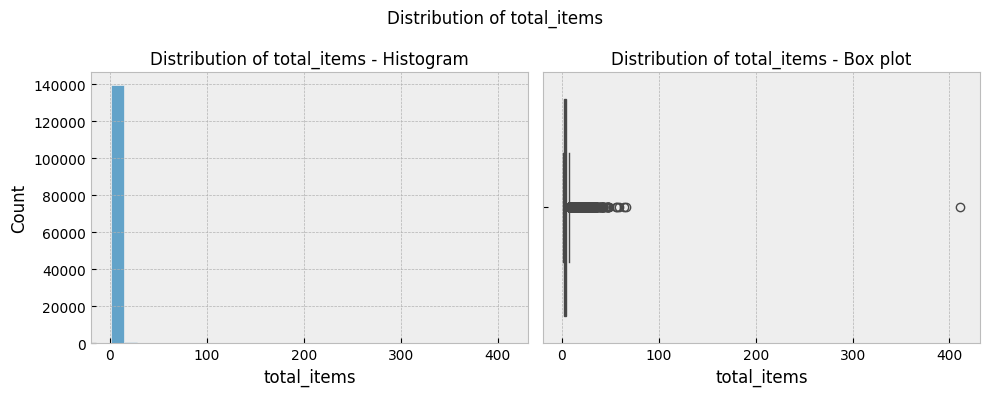


Summary statistics for total_items:
count    140621.000000
mean          3.208582
std           2.727133
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64
Skewness: 26.80


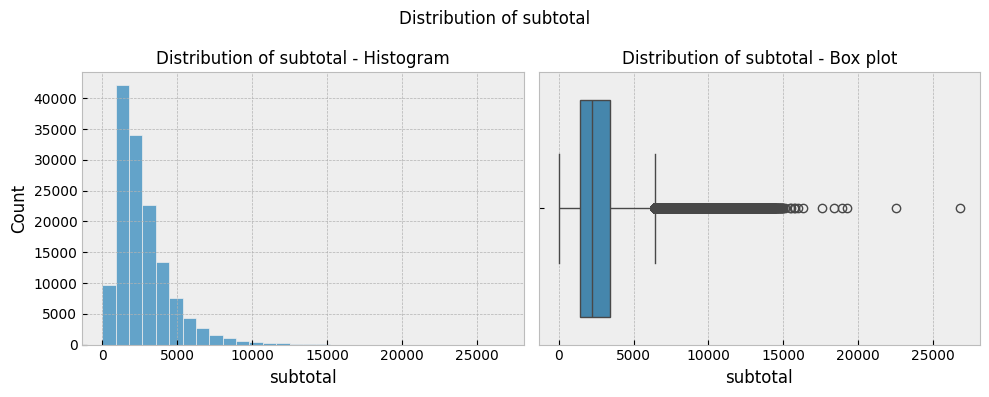


Summary statistics for subtotal:
count    140621.000000
mean       2698.872530
std        1830.808391
min           0.000000
25%        1418.000000
50%        2225.000000
75%        3415.000000
max       26800.000000
Name: subtotal, dtype: float64
Skewness: 1.92


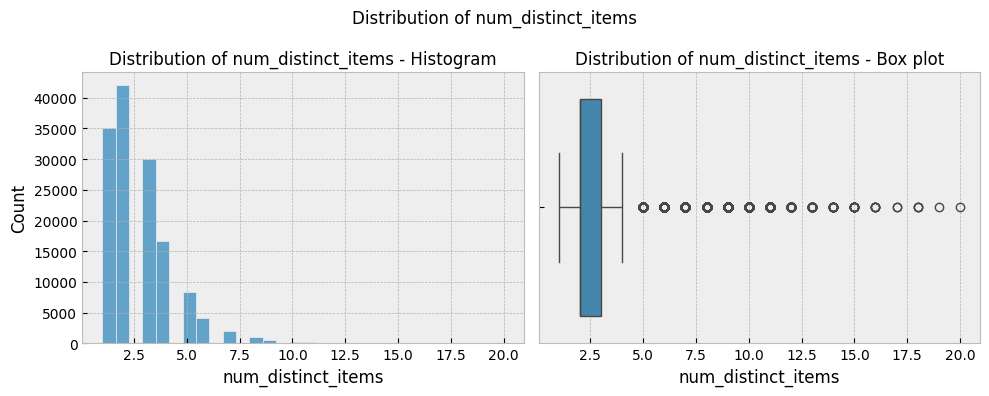


Summary statistics for num_distinct_items:
count    140621.000000
mean          2.676464
std           1.626023
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: num_distinct_items, dtype: float64
Skewness: 1.58


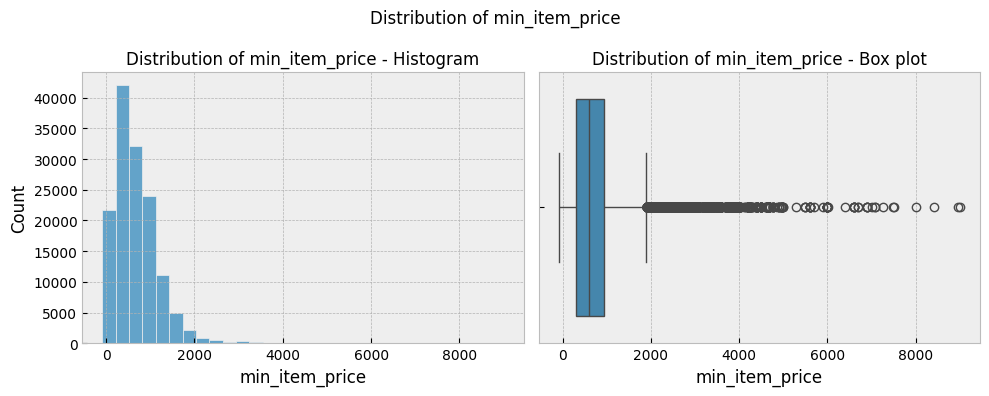


Summary statistics for min_item_price:
count    140621.000000
mean        684.377589
std         518.633806
min         -86.000000
25%         299.000000
50%         595.000000
75%         940.000000
max        8999.000000
Name: min_item_price, dtype: float64
Skewness: 2.25


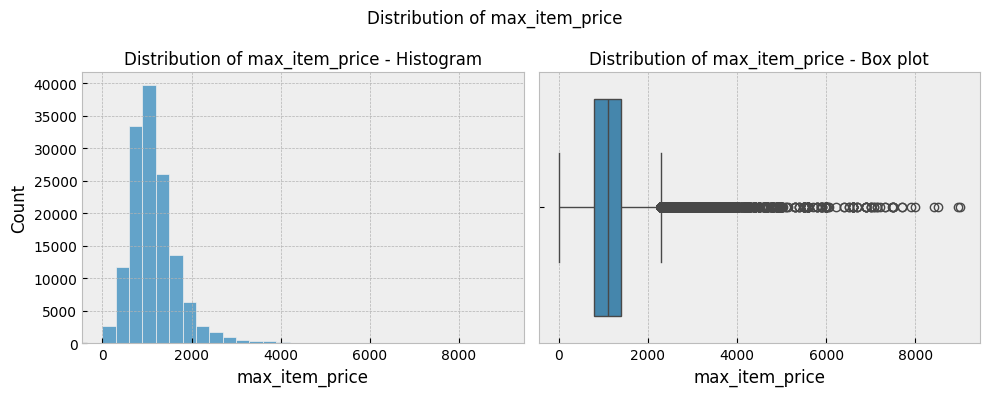


Summary statistics for max_item_price:
count    140621.000000
mean       1159.948656
std         559.693980
min           0.000000
25%         799.000000
50%        1095.000000
75%        1395.000000
max        8999.000000
Name: max_item_price, dtype: float64
Skewness: 2.13


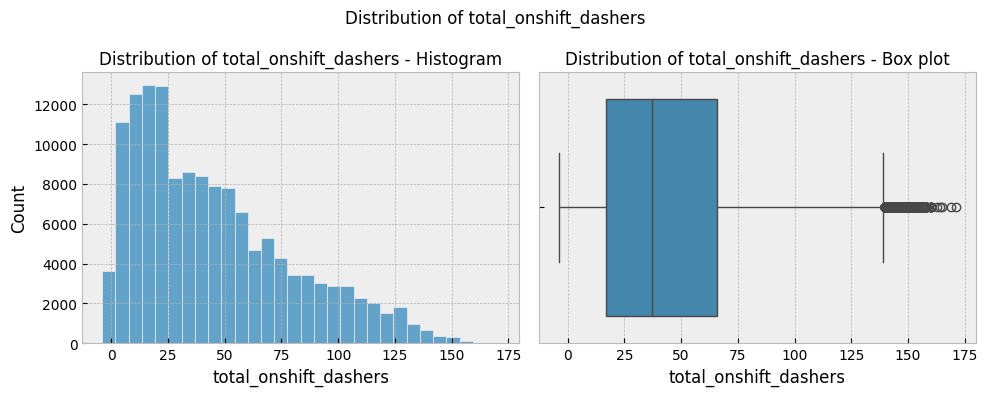


Summary statistics for total_onshift_dashers:
count    140621.000000
mean         44.927948
std          34.572455
min          -4.000000
25%          17.000000
50%          37.000000
75%          66.000000
max         171.000000
Name: total_onshift_dashers, dtype: float64
Skewness: 0.86


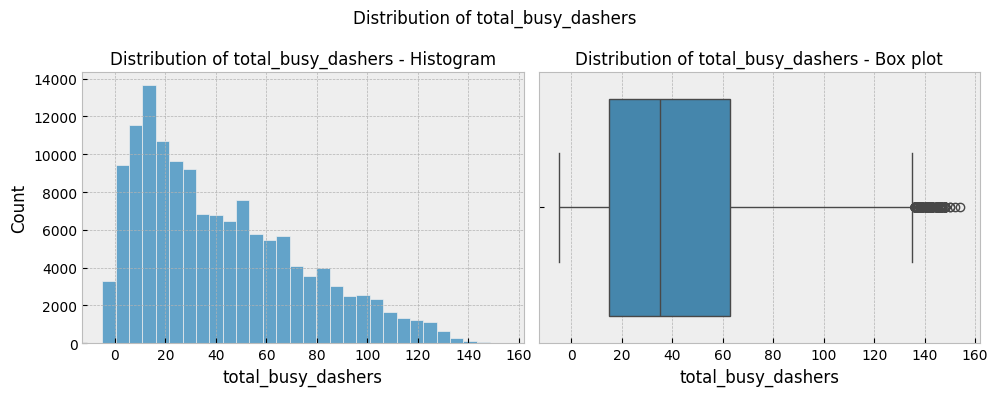


Summary statistics for total_busy_dashers:
count    140621.000000
mean         41.880025
std          32.197755
min          -5.000000
25%          15.000000
50%          35.000000
75%          63.000000
max         154.000000
Name: total_busy_dashers, dtype: float64
Skewness: 0.78


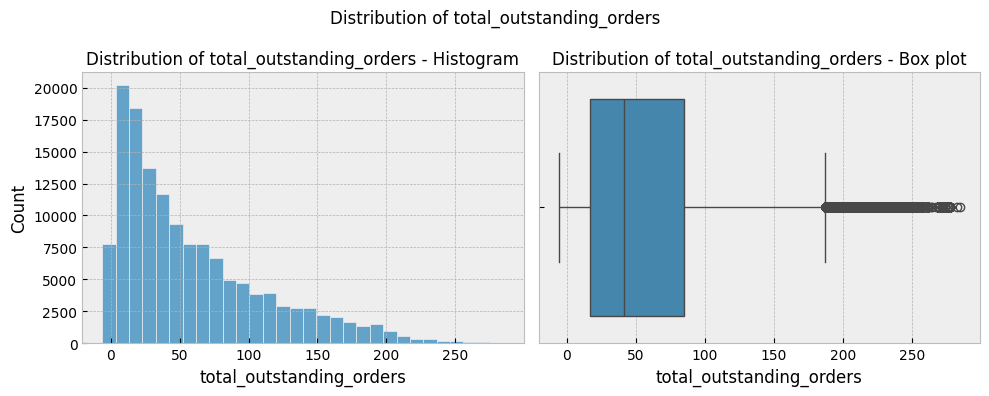


Summary statistics for total_outstanding_orders:
count    140621.000000
mean         58.245148
std          52.773640
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64
Skewness: 1.19


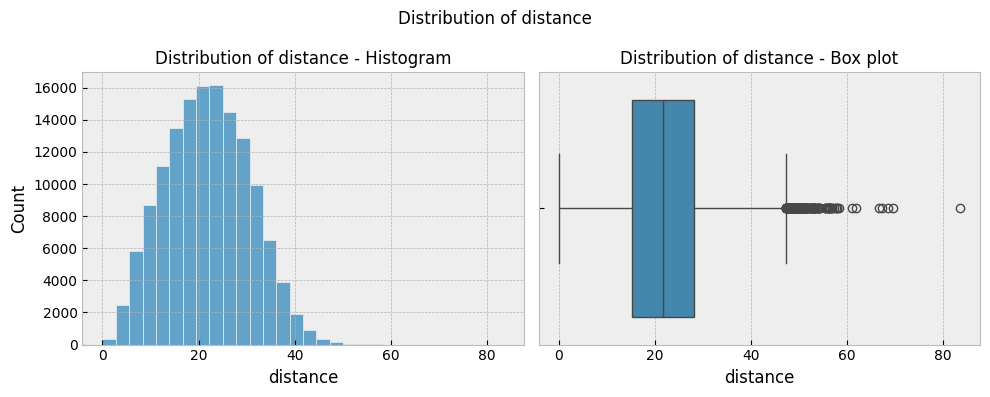


Summary statistics for distance:
count    140621.000000
mean         21.841054
std           8.751147
min           0.000000
25%          15.320000
50%          21.760000
75%          28.120000
max          83.520000
Name: distance, dtype: float64
Skewness: 0.14


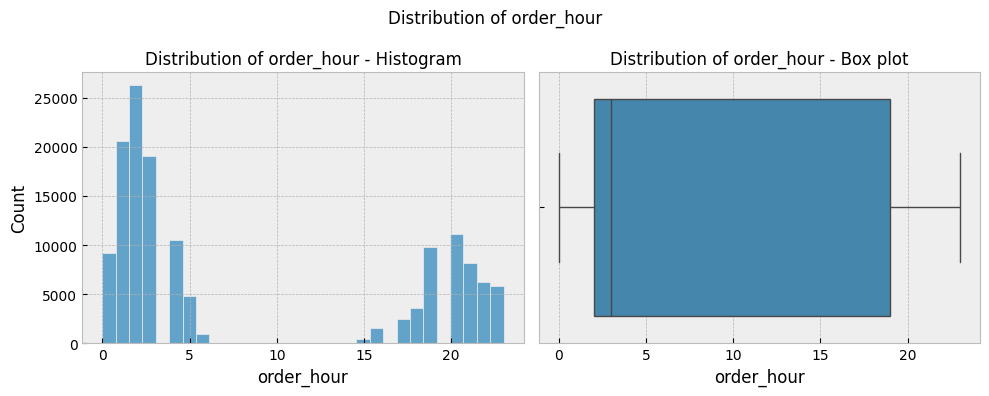


Summary statistics for order_hour:
count    140621.000000
mean          8.475932
std           8.677293
min           0.000000
25%           2.000000
50%           3.000000
75%          19.000000
max          23.000000
Name: order_hour, dtype: float64
Skewness: 0.63


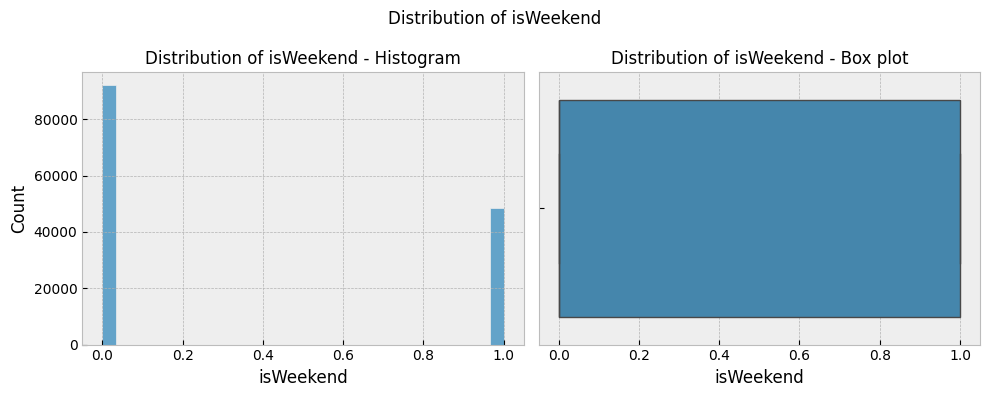


Summary statistics for isWeekend:
count    140621.00000
mean          0.34546
std           0.47552
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: isWeekend, dtype: float64
Skewness: 0.65


In [47]:
# Plot distributions for all numerical columns
for col in numerical_columns:
  plot_distribution(X_train, col, f'Distribution of {col}', is_categorical = False)
  statistics = X_train[col].describe()
  skewness = X_train[col].skew()
  print(f'\nSummary statistics for {col}:')
  print(statistics)
  print(f'Skewness: {skewness:.2f}')

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

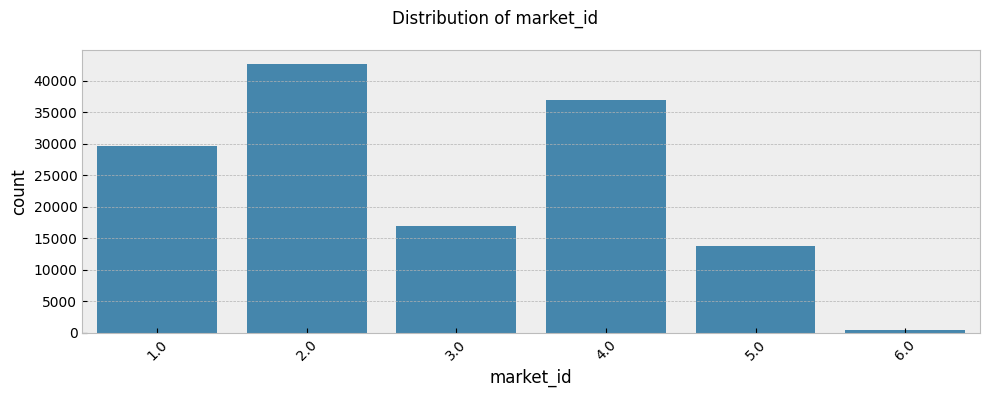

Distribution of market_id:
market_id
2.0    42722
4.0    36961
1.0    29662
3.0    16934
5.0    13838
6.0      504
Name: count, dtype: int64


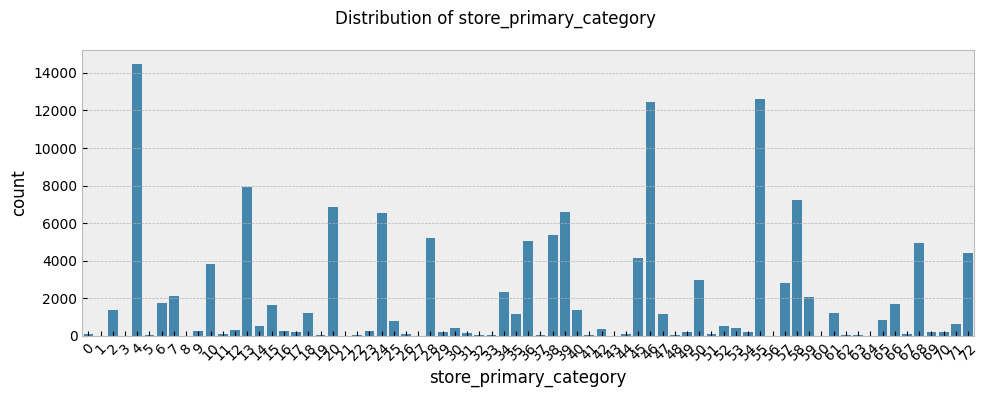

Distribution of store_primary_category:
store_primary_category
4     14483
55    12603
46    12427
13     7907
58     7227
      ...  
1         7
43        6
3         1
8         1
21        0
Name: count, Length: 73, dtype: int64


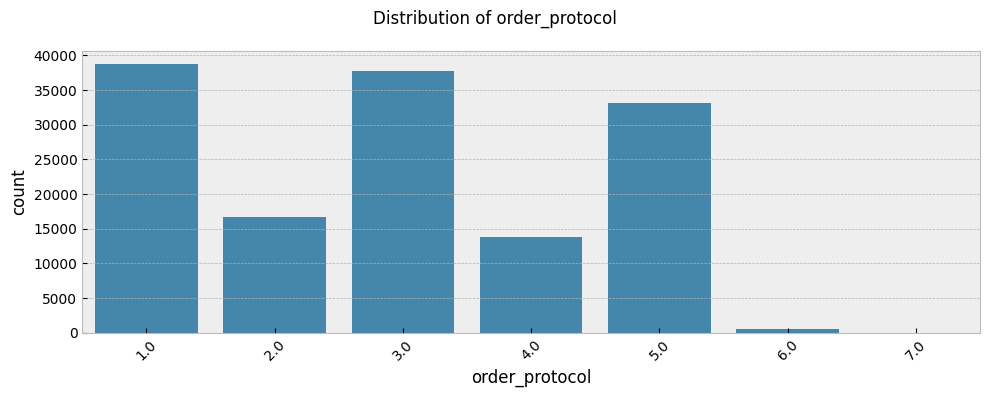

Distribution of order_protocol:
order_protocol
1.0    38746
3.0    37674
5.0    33118
2.0    16689
4.0    13842
6.0      534
7.0       18
Name: count, dtype: int64


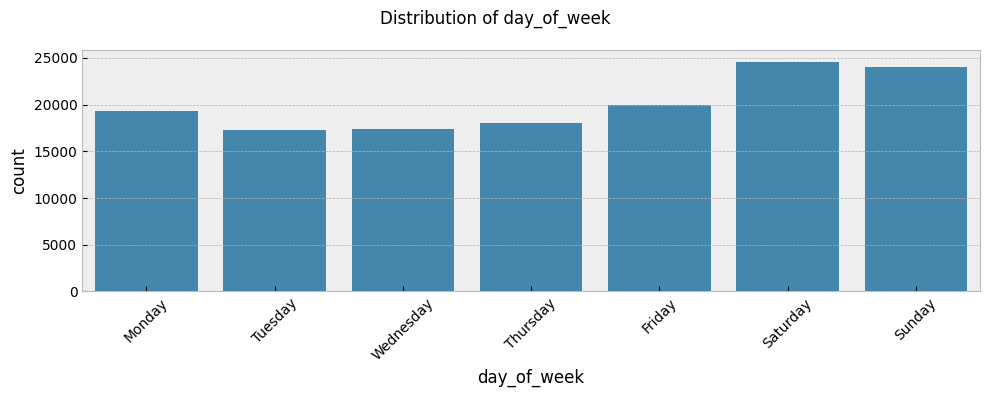

Distribution of day_of_week:
day_of_week
5    24587
6    23992
4    19995
0    19362
3    18010
2    17434
1    17241
Name: count, dtype: int64


In [48]:
# Distribution of categorical columns
for col in categorical_columns:
  plot_distribution(X_train, col, f'Distribution of {col}', is_categorical = True)
  print(f'Distribution of {col}:')
  print(X_train[col].value_counts())


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

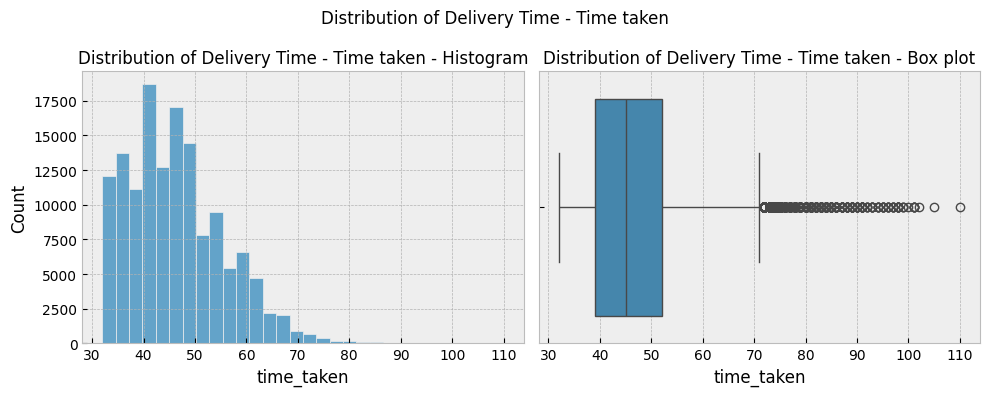

Summary statistics for delivery time
count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64
Skewness:0.76


In [49]:
# Distribution of time_taken
plot_distribution(y_train.to_frame(), 'time_taken', 'Distribution of Delivery Time - Time taken')
statistics = y_train.describe()
skewness = y_train.skew()
print('Summary statistics for delivery time')
print(statistics)
print(f'Skewness:{skewness:.2f}')

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

Relationships Delivery time and Features


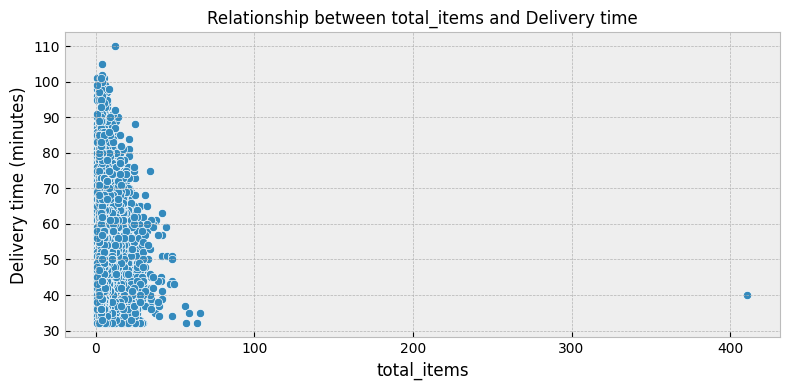

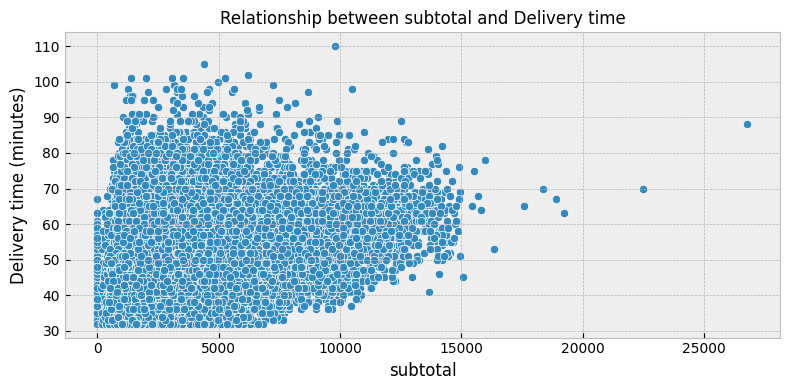

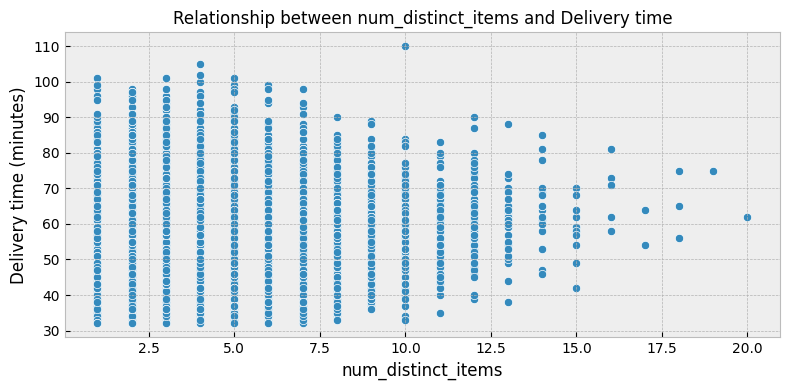

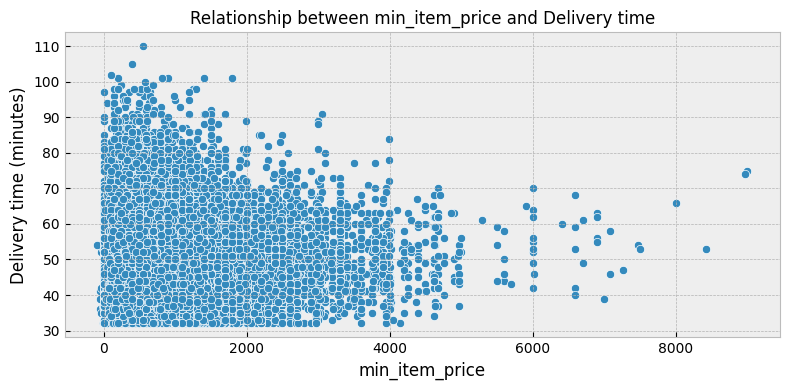

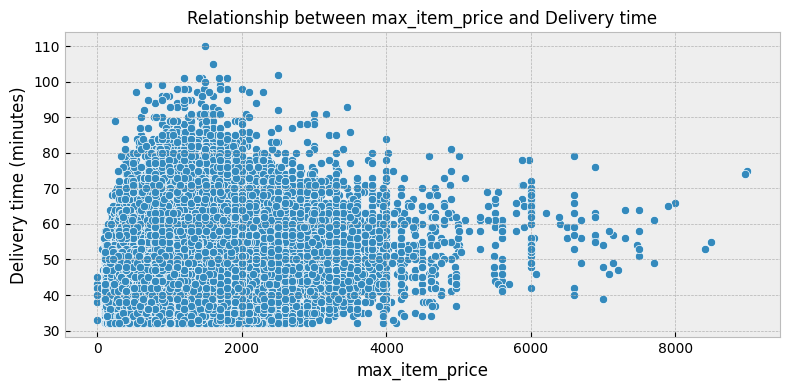

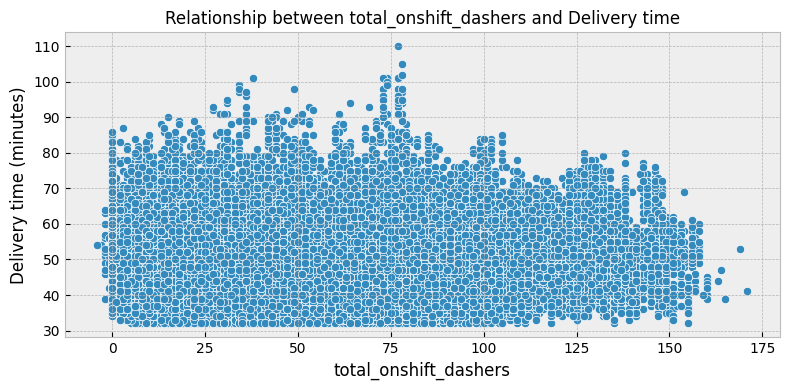

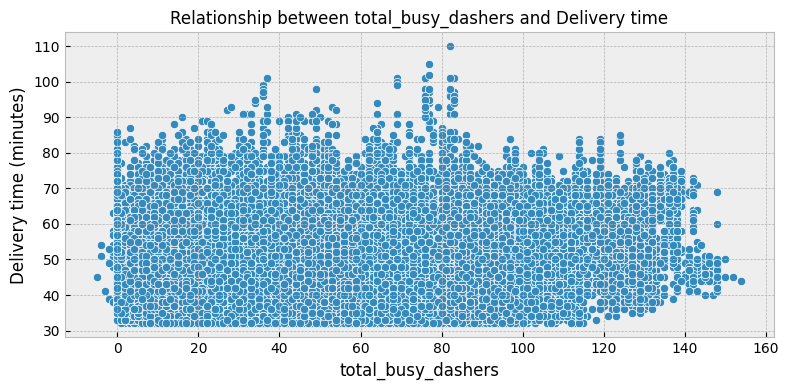

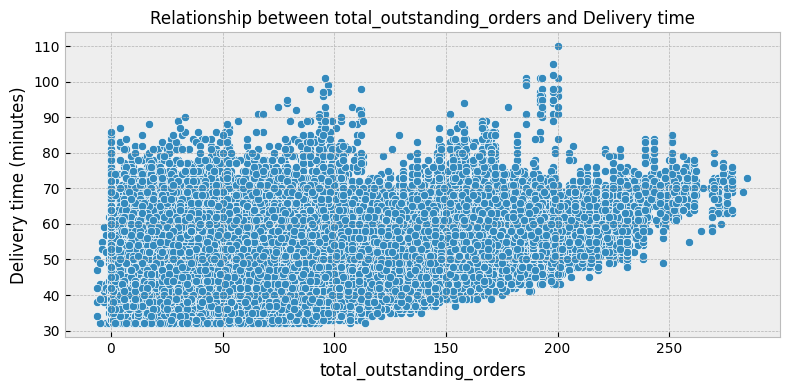

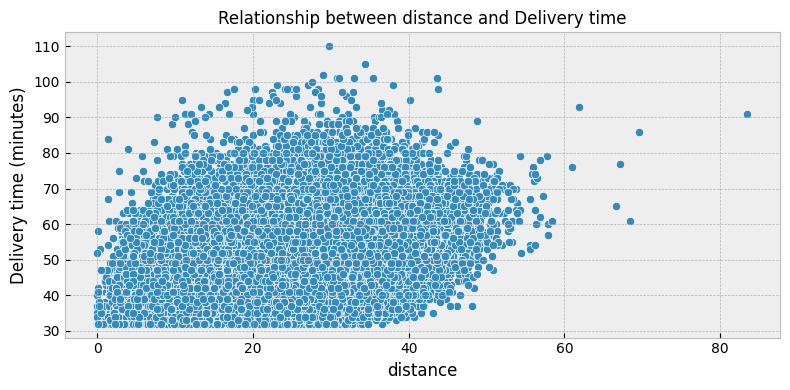

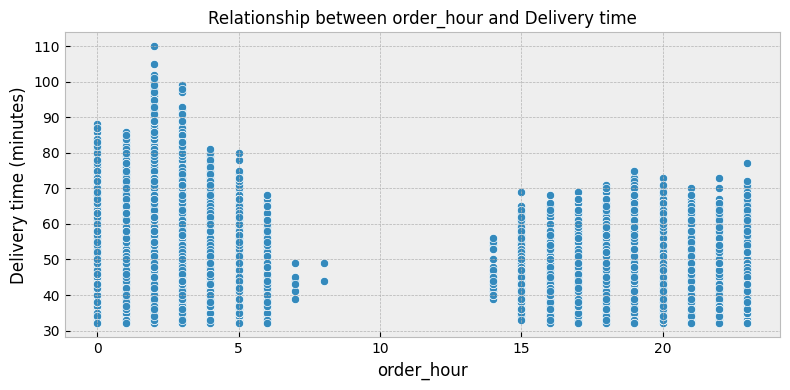

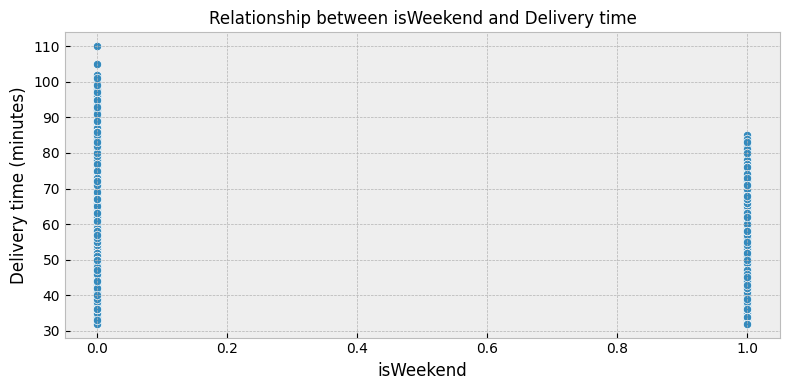

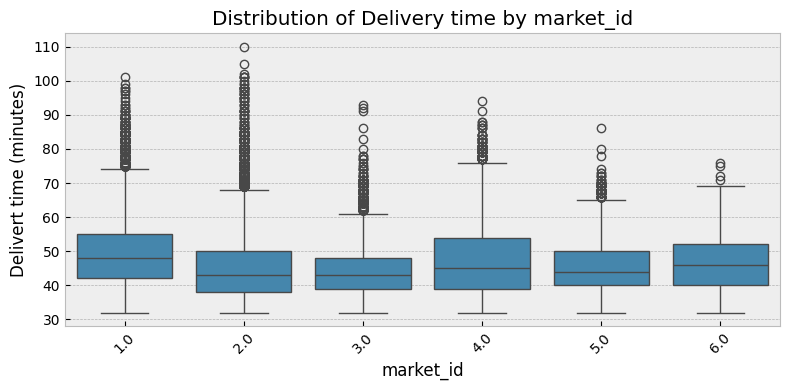

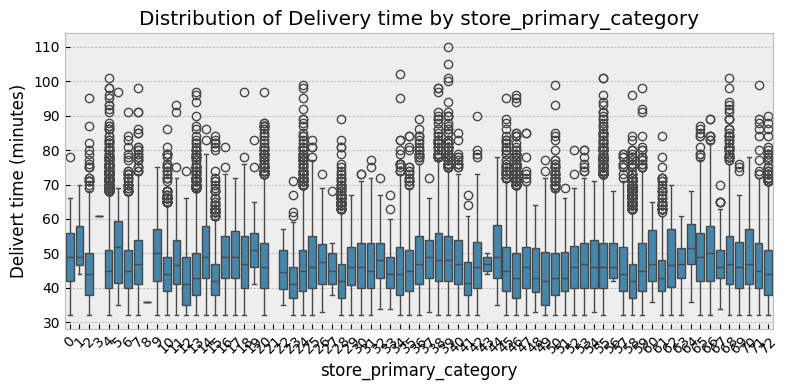

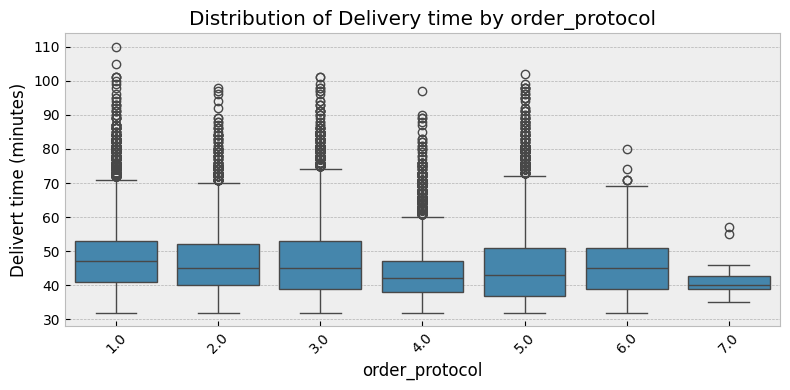

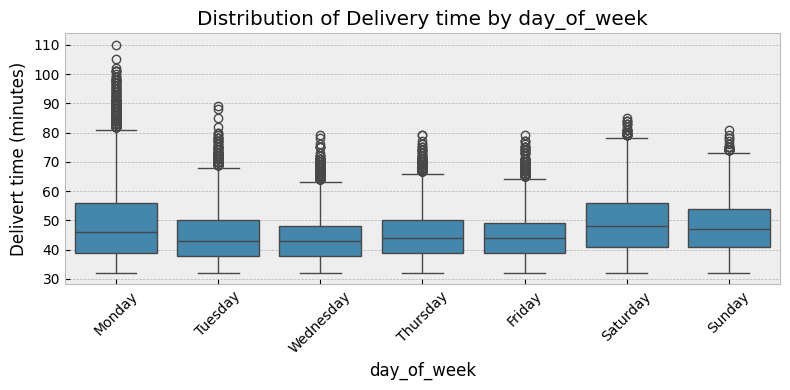

In [50]:
# Scatter plot to visualise the relationship between time_taken and other features
train_df = X_train.copy()
train_df['time_taken'] = y_train
print('Relationships Delivery time and Features')
# Using scatter plots for numerical features
for col in numerical_columns:
  plt.figure(figsize= (8, 4))
  sns.scatterplot(y = train_df['time_taken'], x = train_df[col])
  plt.title(f'Relationship between {col} and Delivery time', size = 12)
  plt.xlabel(col)
  plt.ylabel('Delivery time (minutes)')
  plt.tight_layout()
  plt.show()
# Using Box plots for categorical features
for col in categorical_columns:
  plt.figure(figsize = (8, 4))
  sns.boxplot(x = train_df[col], y = train_df['time_taken'])
  if col == 'day_of_week':
    day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.xticks(ticks = range(len(day_labels)), labels = day_labels, rotation = 45)
  else:
    plt.xticks(rotation = 45)
  plt.title(f'Distribution of Delivery time by {col}')
  plt.xlabel(col)
  plt.ylabel('Delivert time (minutes)')
  plt.tight_layout()
  plt.show()

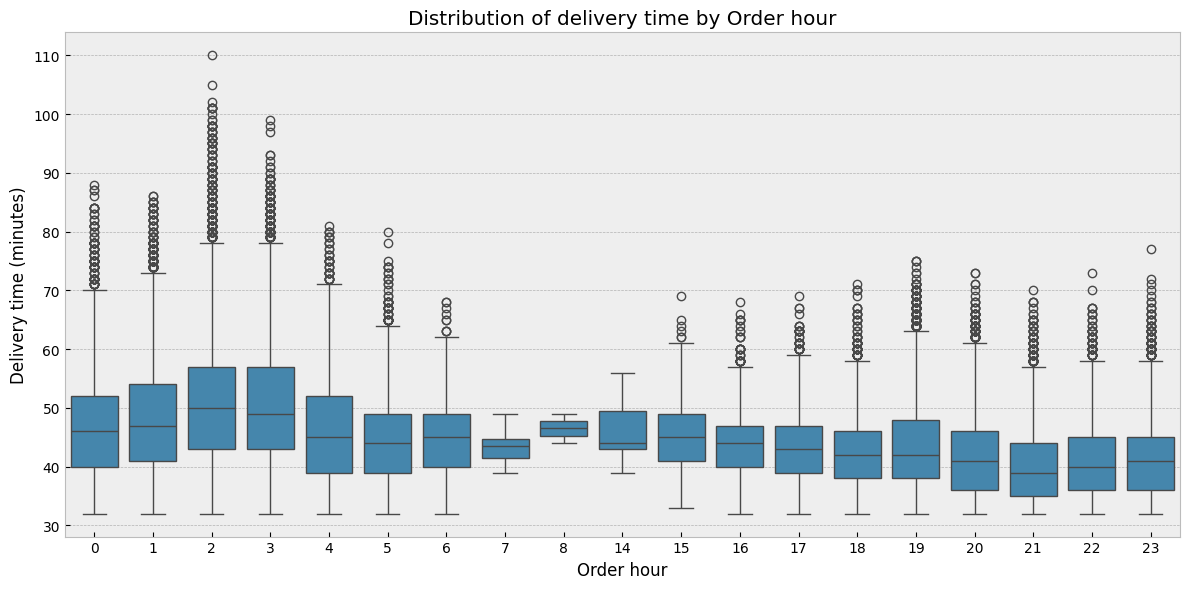

In [51]:
# Show the distribution of time_taken for different hours
plt.figure(figsize = (12, 6))
sns.boxplot(x = train_df['order_hour'], y = train_df['time_taken'])
plt.title('Distribution of delivery time by Order hour')
plt.xlabel('Order hour')
plt.ylabel('Delivery time (minutes)')
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

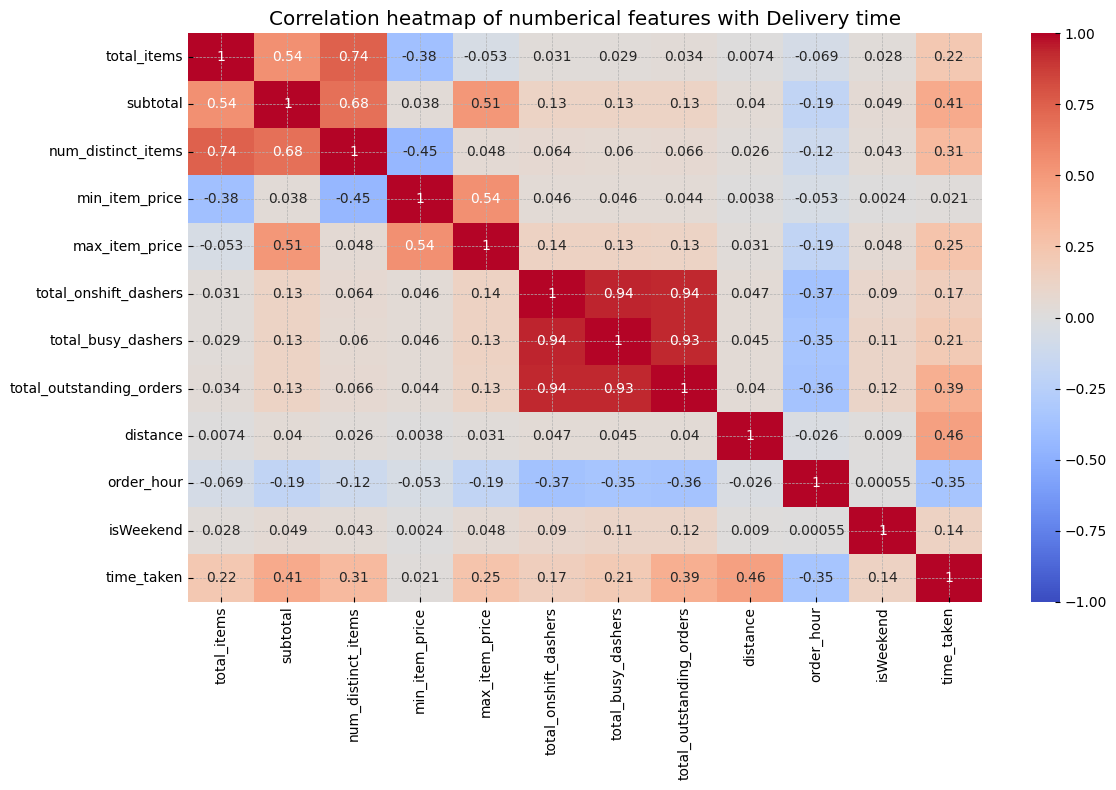

In [52]:
# Plot the heatmap of the correlation matrix
corr_matrix = train_df[numerical_columns + ['time_taken']].corr()
# Plot heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0)
plt.title('Correlation heatmap of numberical features with Delivery time')
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [53]:
# Drop 3-5 weakly correlated columns from training dataset
delivery_time_correlations = abs(corr_matrix['time_taken']).sort_values(ascending = True)
# Define weak correlation thershold (weak beteen -0.3 and 0.3)
weak_correlation_thershold = 0.3
weakly_correlated = delivery_time_correlations[abs(delivery_time_correlations) < weak_correlation_thershold]
columns_to_drop = weakly_correlated.index[:3]
X_train_dropped = X_train.drop(columns = columns_to_drop)
print(f'\nCorrelation with Delivery time:\n{delivery_time_correlations}')
print(f'\nWeakly correlated columns (|correlation| < {weak_correlation_thershold}): {list(weakly_correlated.index)}')
print(f'\nDropped columns: {list(columns_to_drop)}')
print(f'\nUpdated X_train columns: {list(X_train_dropped.columns)}')


Correlation with Delivery time:
min_item_price              0.021151
isWeekend                   0.137057
total_onshift_dashers       0.171828
total_busy_dashers          0.206514
total_items                 0.220804
max_item_price              0.254650
num_distinct_items          0.312510
order_hour                  0.345716
total_outstanding_orders    0.385028
subtotal                    0.413392
distance                    0.461026
time_taken                  1.000000
Name: time_taken, dtype: float64

Weakly correlated columns (|correlation| < 0.3): ['min_item_price', 'isWeekend', 'total_onshift_dashers', 'total_busy_dashers', 'total_items', 'max_item_price']

Dropped columns: ['min_item_price', 'isWeekend', 'total_onshift_dashers']

Updated X_train columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'day_of_week']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

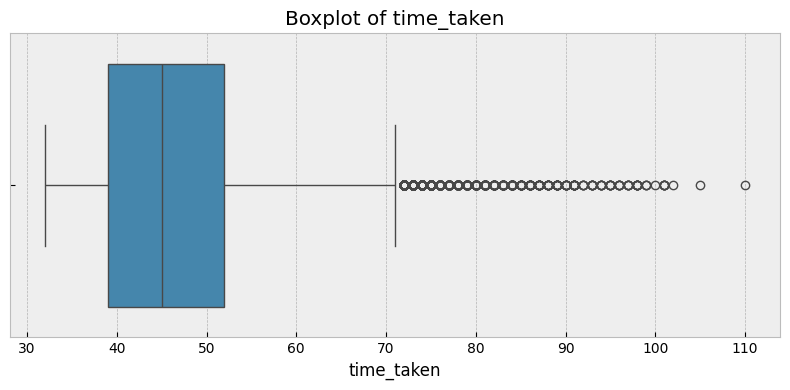

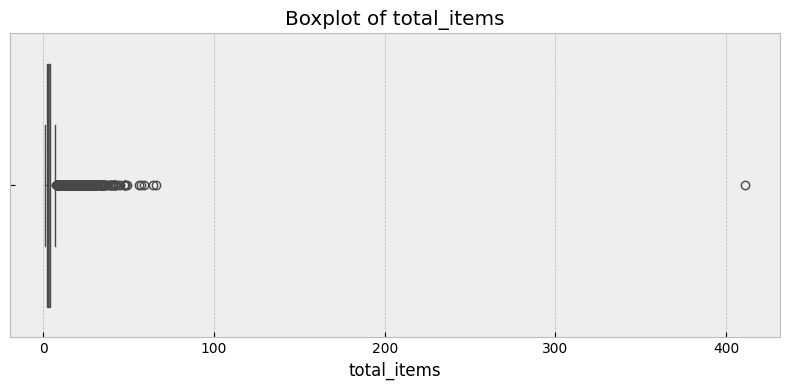

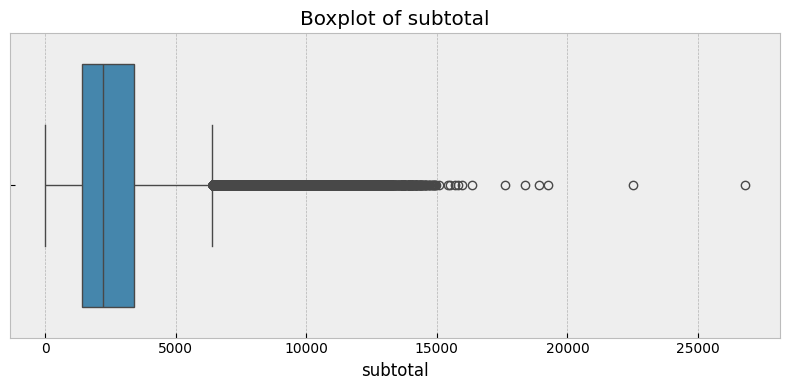

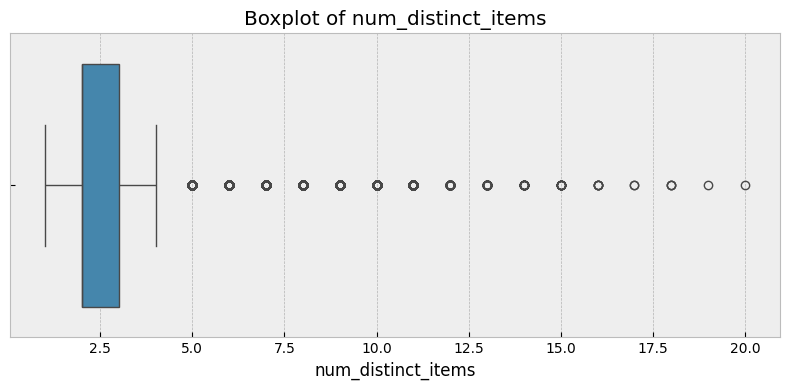

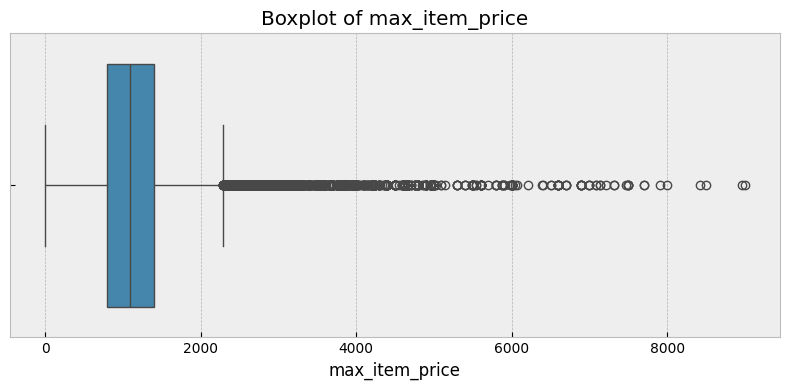

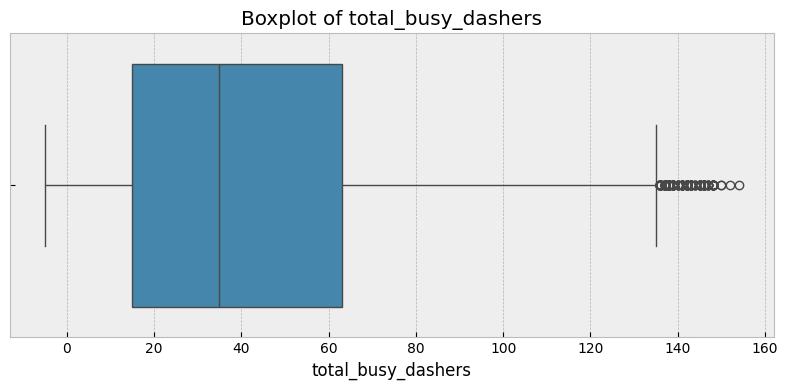

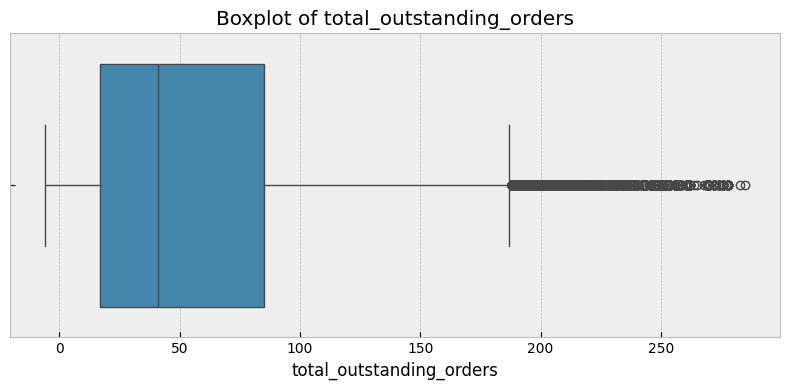

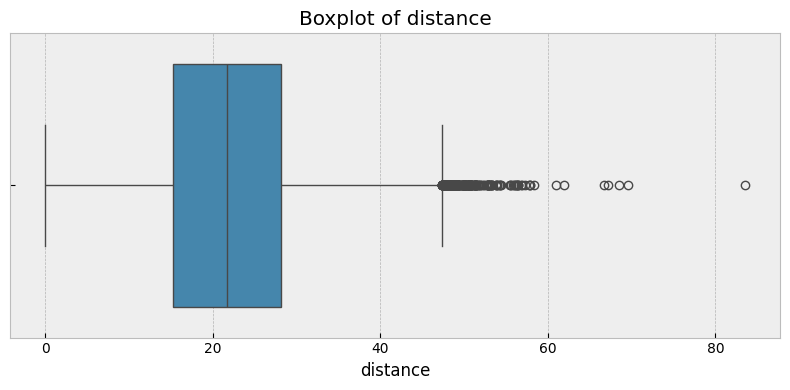

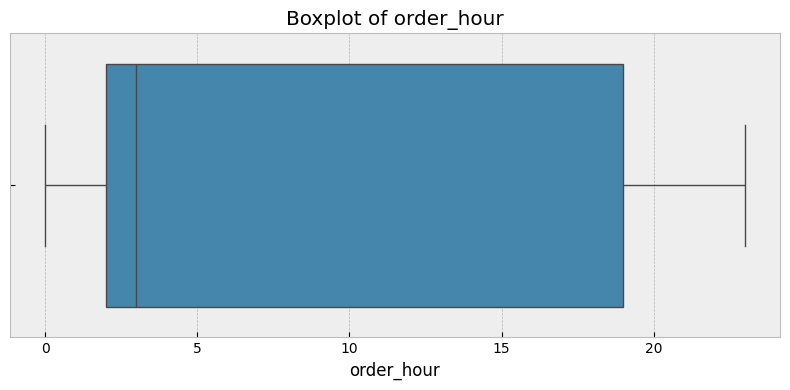

In [54]:
# Boxplot for time_taken
# Update numerical columns to exclude dropped features weak correlations
remaining_numerical_cols = [col for col in numerical_columns if col not in columns_to_drop]
# Boxplot for outlier detection of remaining mumerical features
for col in ['time_taken'] + remaining_numerical_cols:
  plt.figure(figsize = (8, 4))
  sns.boxplot(x = train_df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [55]:
# Handle outliers
def cap_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print(f'IQR of {column} - Q1: {Q1}, Q3: {Q3}, Lower: {lower_bound}, Upper: {upper_bound}')
  df[column] = df[column].clip(lower_bound, upper_bound)
  if column in ['total_items', 'num_distinct_items', 'total_outstanding_orders', 'total_busy_dashers','subtotal']:
    df[column] = df[column].clip(lower = 0)
  if column == 'distance':
    df[column] = df[column].clip(lower = 0.01)
  df[column] = df[column].clip(lower_bound, upper_bound)
  return df

# Apply outliers capping to delivery_time and remaining numerical columns
columns_to_handle = ['time_taken'] + remaining_numerical_cols
for col in columns_to_handle:
  train_df_applied = cap_outliers(train_df, col)

# Update X_train and y_train with handled outliers
X_train_handled = train_df_applied.drop('time_taken', axis = 1)
y_train_handled = train_df_applied['time_taken']

# Update drop weakly correlated columns in train data handled outliers
X_train_dropped_weak_correlation = X_train_handled.drop(columns = columns_to_drop)
# Display update statistics
print('\nUpdated satistics after ouliers handling')
for col in ['time_taken'] + remaining_numerical_cols:
  statistics = train_df_applied[col].describe()
  skewness = train_df_applied[col].skew()
  print(f'\n{col}:\n{statistics}')
  print(f'New skewness: {skewness:.2f}')

IQR of time_taken - Q1: 39.0, Q3: 52.0, Lower: 19.5, Upper: 71.5
IQR of total_items - Q1: 2.0, Q3: 4.0, Lower: -1.0, Upper: 7.0
IQR of subtotal - Q1: 1418.0, Q3: 3415.0, Lower: -1577.5, Upper: 6410.5
IQR of num_distinct_items - Q1: 2.0, Q3: 3.0, Lower: 0.5, Upper: 4.5
IQR of max_item_price - Q1: 799.0, Q3: 1395.0, Lower: -95.0, Upper: 2289.0
IQR of total_busy_dashers - Q1: 15.0, Q3: 63.0, Lower: -57.0, Upper: 135.0
IQR of total_outstanding_orders - Q1: 17.0, Q3: 85.0, Lower: -85.0, Upper: 187.0
IQR of distance - Q1: 15.32, Q3: 28.12, Lower: -3.8800000000000026, Upper: 47.32000000000001
IQR of order_hour - Q1: 2.0, Q3: 19.0, Lower: -23.5, Upper: 44.5

Updated satistics after ouliers handling

time_taken:
count    140621.000000
mean         46.139819
std           9.123066
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max          71.500000
Name: time_taken, dtype: float64
New skewness: 0.60

total_items:
count    140621.000000
mean          

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [56]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_col_val = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers',
                     'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']
categorical_col_val = ['market_id', 'store_primary_category', 'order_protocol', 'day_of_week']
# Define function for plotting distributions
def plot_distribution(data, column, title, is_categorical = False):
  plt.figure(figsize = (10,4))
  if is_categorical:
    sns.countplot(x = data[column])
    if column == 'day_of_week':
      day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
      plt.xticks(ticks = range(len(day_labels)), labels = day_labels, rotation = 45)
    else:
      plt.xticks(rotation = 45)
  else:
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins = 30)
    plt.title(f'{title} - Histogram', size = 12)
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[column])
    plt.title(f'{title} - Box plot', size = 12)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

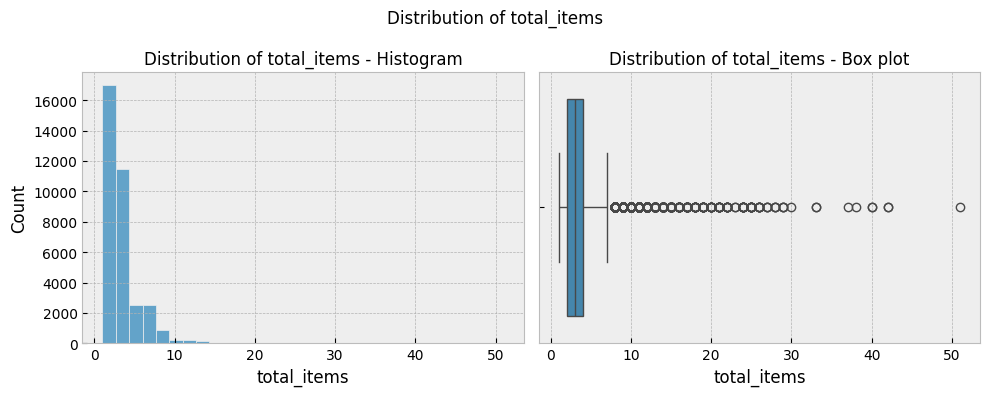


Summary statistics on Validation Data for total_items:
count    35156.000000
mean         3.190551
std          2.450259
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         51.000000
Name: total_items, dtype: float64
Skewness: 3.51


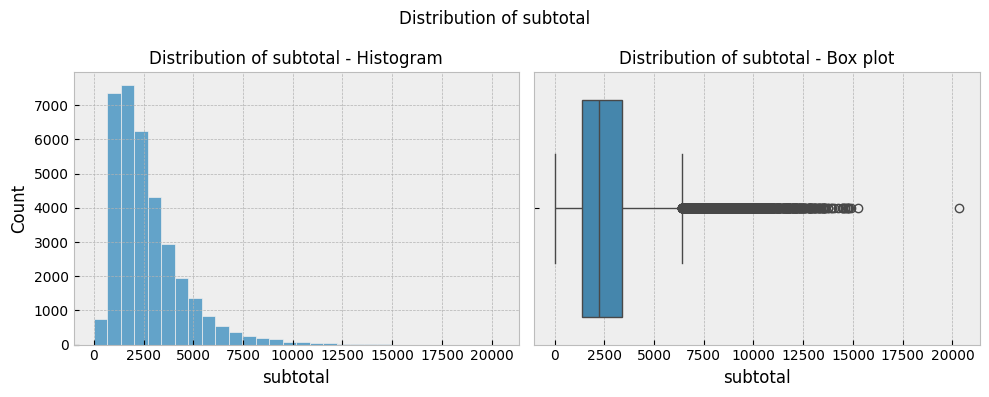


Summary statistics on Validation Data for subtotal:
count    35156.000000
mean      2690.065764
std       1819.522077
min          0.000000
25%       1400.000000
50%       2220.000000
75%       3400.000000
max      20350.000000
Name: subtotal, dtype: float64
Skewness: 1.90


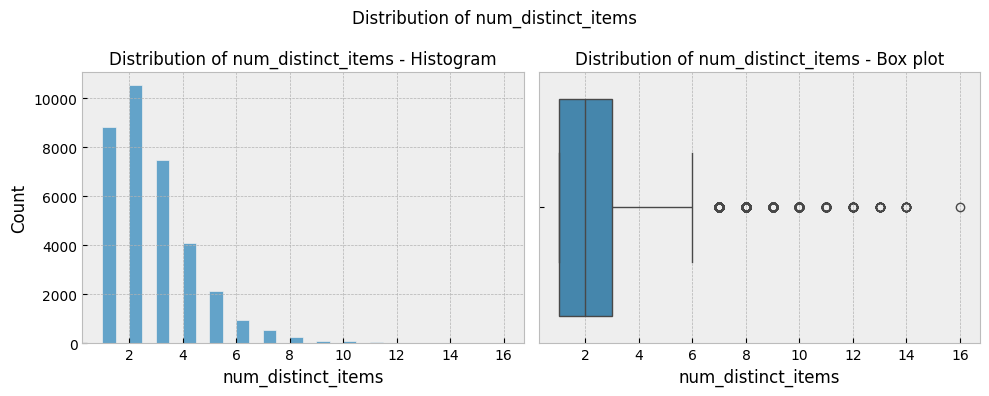


Summary statistics on Validation Data for num_distinct_items:
count    35156.000000
mean         2.669445
std          1.624321
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: num_distinct_items, dtype: float64
Skewness: 1.57


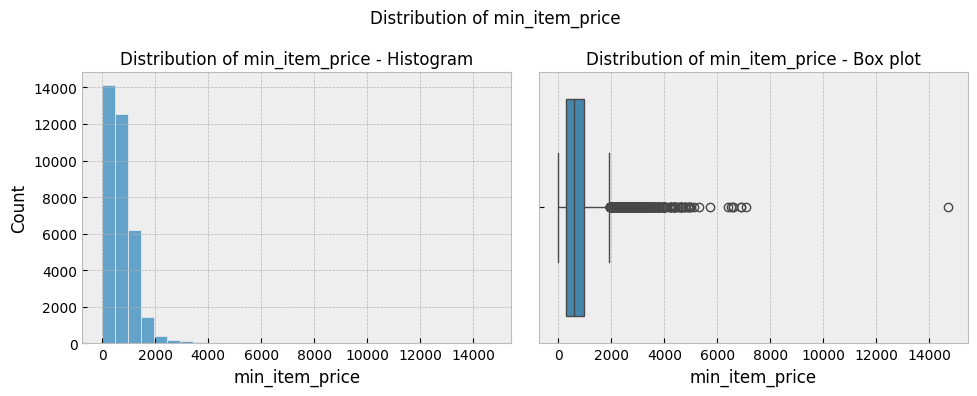


Summary statistics on Validation Data for min_item_price:
count    35156.000000
mean       687.316760
std        524.850408
min        -13.000000
25%        299.000000
50%        595.000000
75%        950.000000
max      14700.000000
Name: min_item_price, dtype: float64
Skewness: 2.66


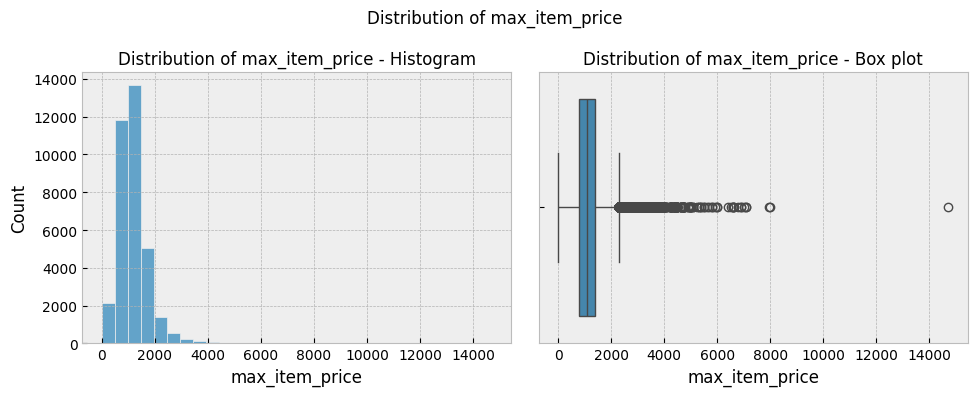


Summary statistics on Validation Data for max_item_price:
count    35156.000000
mean      1160.998436
std        565.351295
min          0.000000
25%        799.000000
50%       1095.000000
75%       1395.000000
max      14700.000000
Name: max_item_price, dtype: float64
Skewness: 2.48


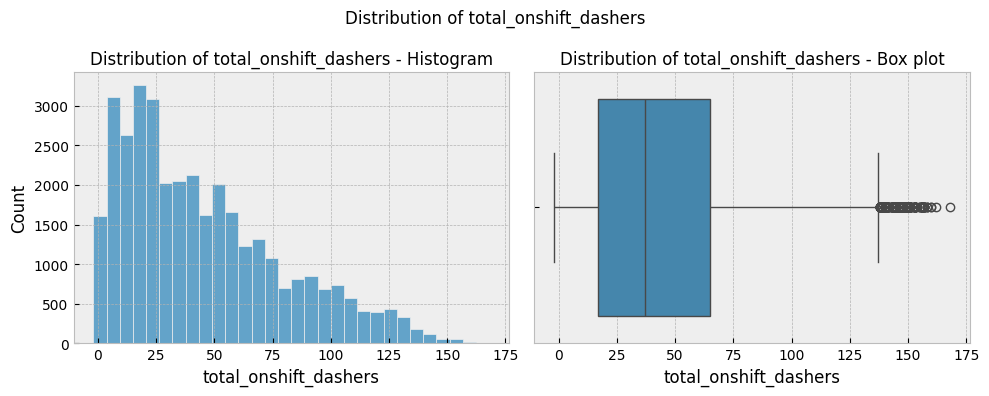


Summary statistics on Validation Data for total_onshift_dashers:
count    35156.000000
mean        44.881528
std         34.434044
min         -2.000000
25%         17.000000
50%         37.000000
75%         65.000000
max        168.000000
Name: total_onshift_dashers, dtype: float64
Skewness: 0.86


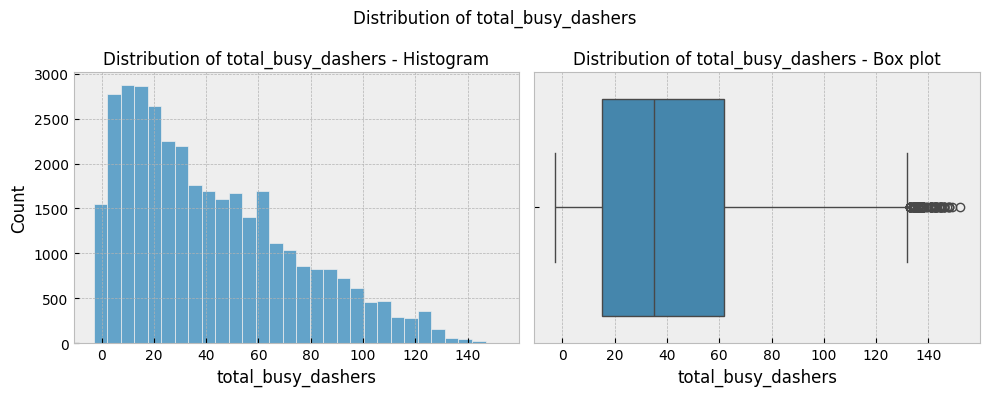


Summary statistics on Validation Data for total_busy_dashers:
count    35156.000000
mean        41.786807
std         32.051588
min         -3.000000
25%         15.000000
50%         35.000000
75%         62.000000
max        152.000000
Name: total_busy_dashers, dtype: float64
Skewness: 0.78


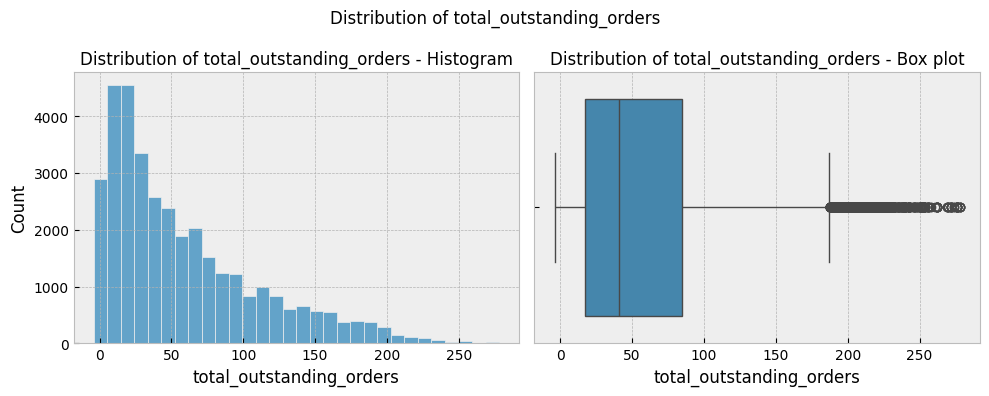


Summary statistics on Validation Data for total_outstanding_orders:
count    35156.000000
mean        58.169985
std         52.561019
min         -4.000000
25%         17.000000
50%         41.000000
75%         85.000000
max        278.000000
Name: total_outstanding_orders, dtype: float64
Skewness: 1.19


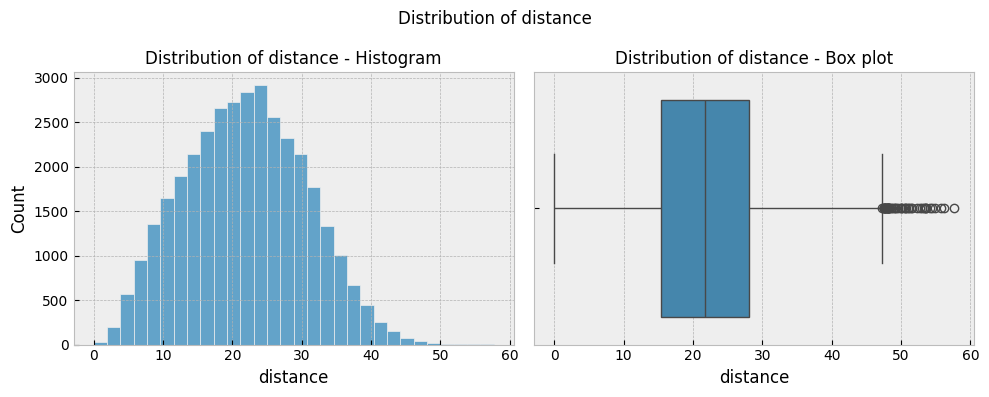


Summary statistics on Validation Data for distance:
count    35156.000000
mean        21.851231
std          8.739083
min          0.000000
25%         15.360000
50%         21.800000
75%         28.120000
max         57.680000
Name: distance, dtype: float64
Skewness: 0.13


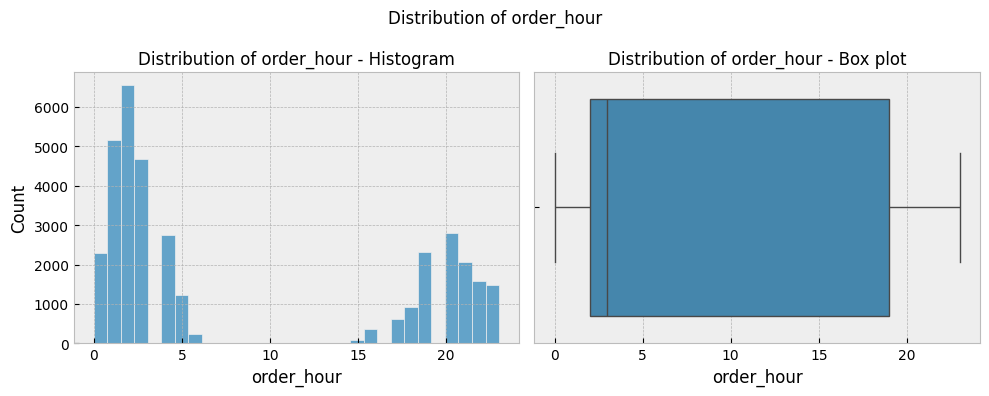


Summary statistics on Validation Data for order_hour:
count    35156.000000
mean         8.463477
std          8.674988
min          0.000000
25%          2.000000
50%          3.000000
75%         19.000000
max         23.000000
Name: order_hour, dtype: float64
Skewness: 0.63


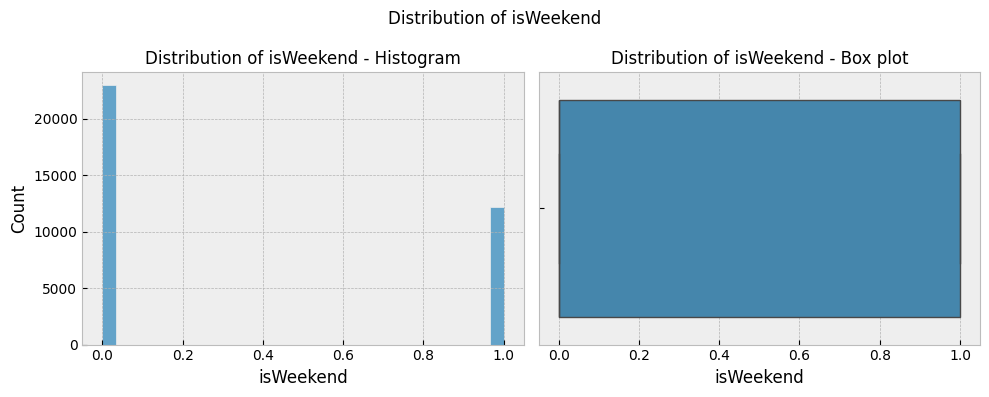


Summary statistics on Validation Data for isWeekend:
count    35156.000000
mean         0.346228
std          0.475774
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: isWeekend, dtype: float64
Skewness: 0.65


In [57]:
# Plot distributions for all numerical columns
for col in numerical_col_val:
  plot_distribution(X_test, col, f'Distribution of {col}', is_categorical = False)
  statistics = X_test[col].describe()
  skewness = X_test[col].skew()
  print(f'\nSummary statistics on Validation Data for {col}:')
  print(statistics)
  print(f'Skewness: {skewness:.2f}')


##### **4.1.2**
Check the distribution of categorical features

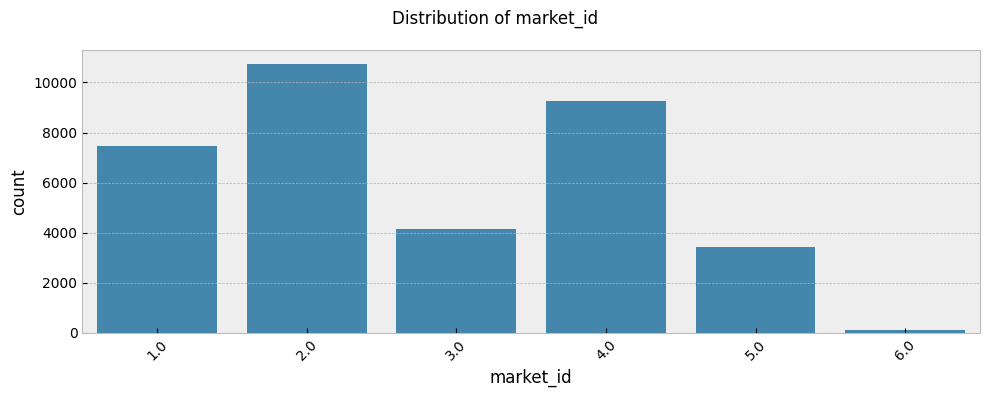

Distribution of market_id:
market_id
2.0    10747
4.0     9261
1.0     7453
3.0     4141
5.0     3420
6.0      134
Name: count, dtype: int64


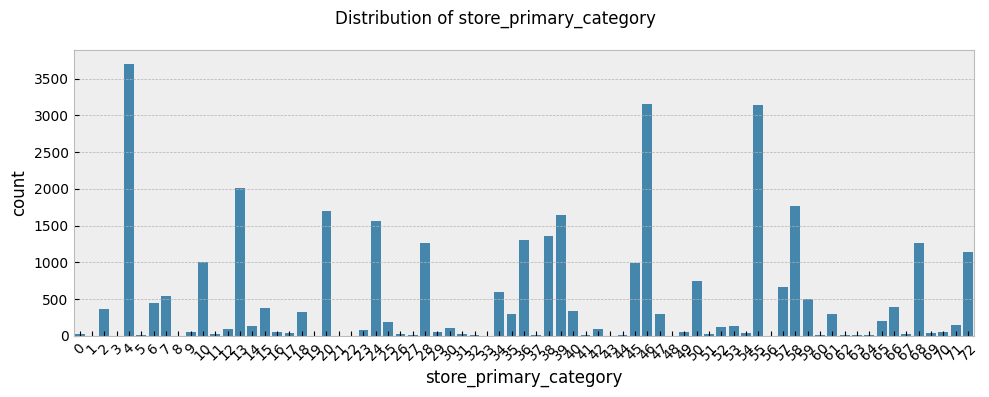

Distribution of store_primary_category:
store_primary_category
4     3700
46    3159
55    3142
13    2008
58    1768
      ... 
19       3
56       2
8        1
21       1
3        0
Name: count, Length: 73, dtype: int64


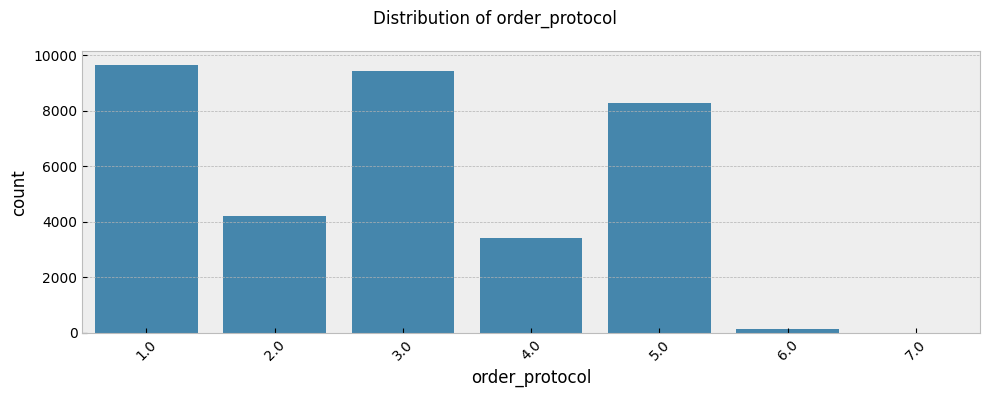

Distribution of order_protocol:
order_protocol
1.0    9658
3.0    9451
5.0    8297
2.0    4201
4.0    3404
6.0     144
7.0       1
Name: count, dtype: int64


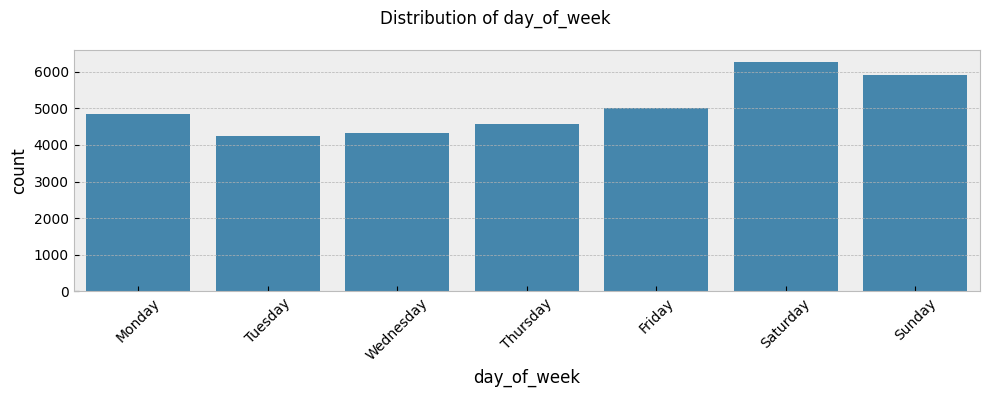

Distribution of day_of_week:
day_of_week
5    6271
6    5901
4    5009
0    4840
3    4574
2    4319
1    4242
Name: count, dtype: int64


In [58]:
# Distribution of categorical columns
for col in categorical_col_val:
  plot_distribution(X_test, col, f'Distribution of {col}', is_categorical = True)
  print(f'Distribution of {col}:')
  print(X_test[col].value_counts())

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

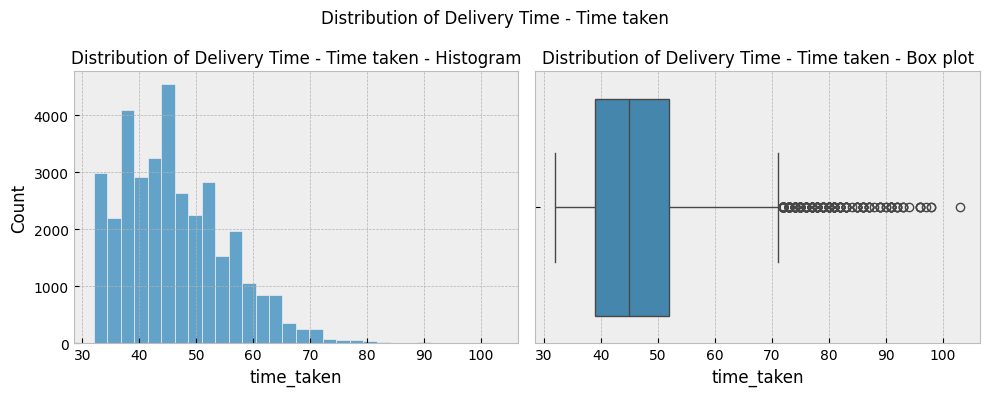

Summary statistics for delivery time
count    35156.000000
mean        46.222778
std          9.355735
min         32.000000
25%         39.000000
50%         45.000000
75%         52.000000
max        103.000000
Name: time_taken, dtype: float64
Skewness:0.78


In [59]:
# Distribution of time_taken
plot_distribution(y_test.to_frame(), 'time_taken', 'Distribution of Delivery Time - Time taken')
statistics = y_test.describe()
skewness = y_test.skew()
print('Summary statistics for delivery time')
print(statistics)
print(f'Skewness:{skewness:.2f}')

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

Relationships Delivery time and Features on Validation Data


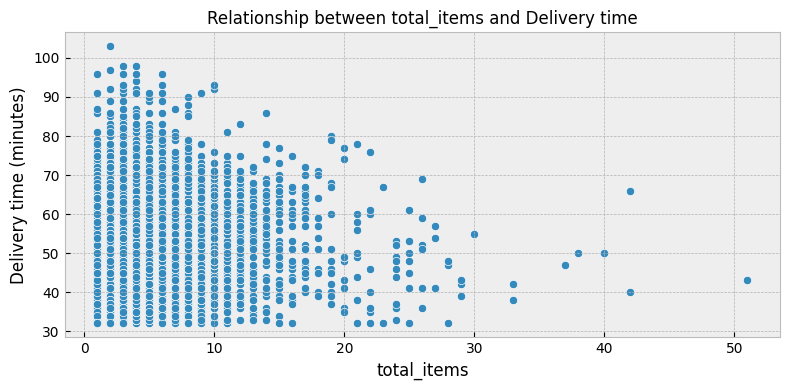

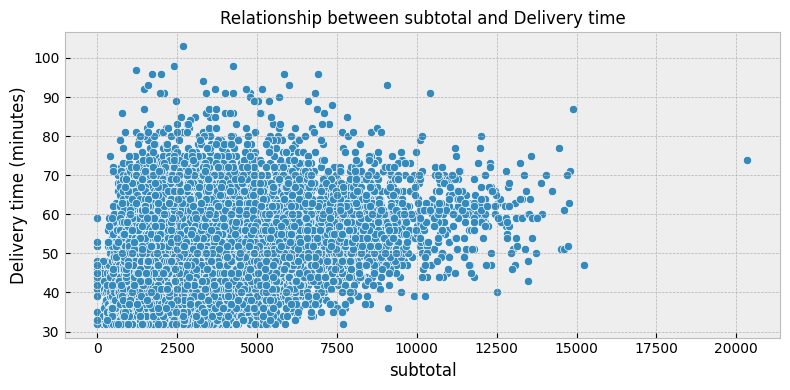

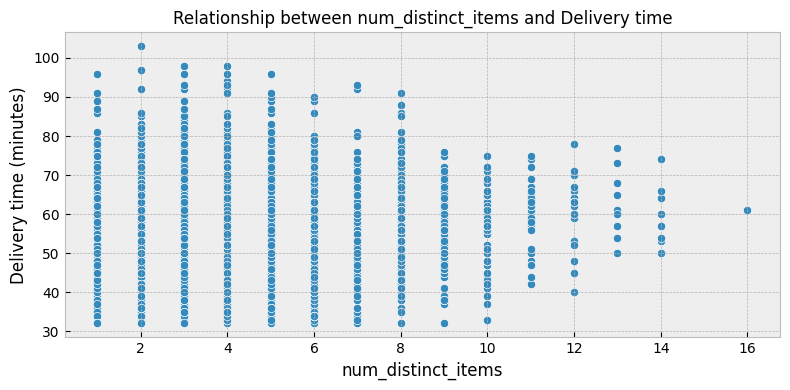

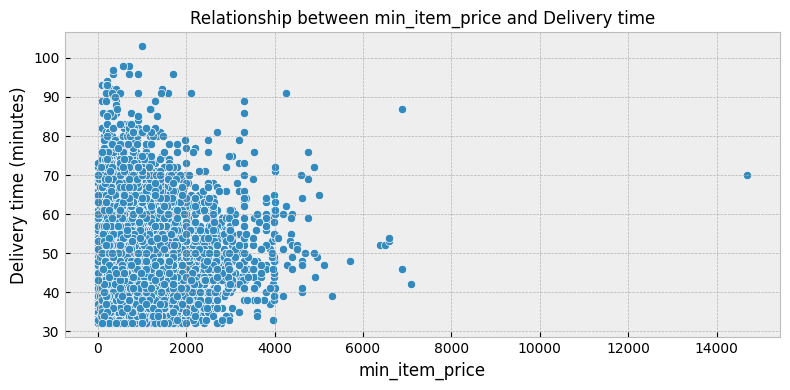

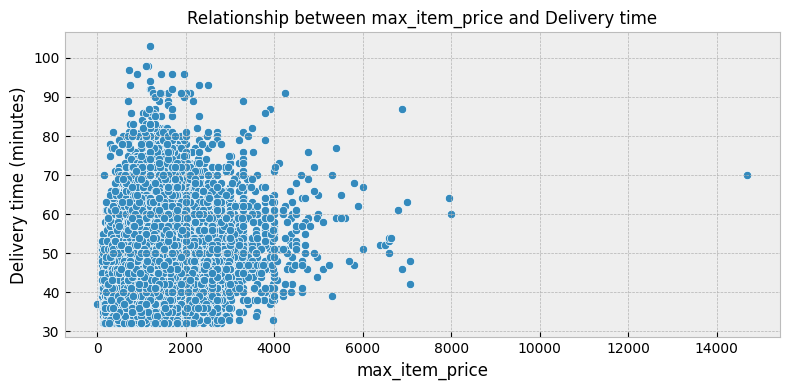

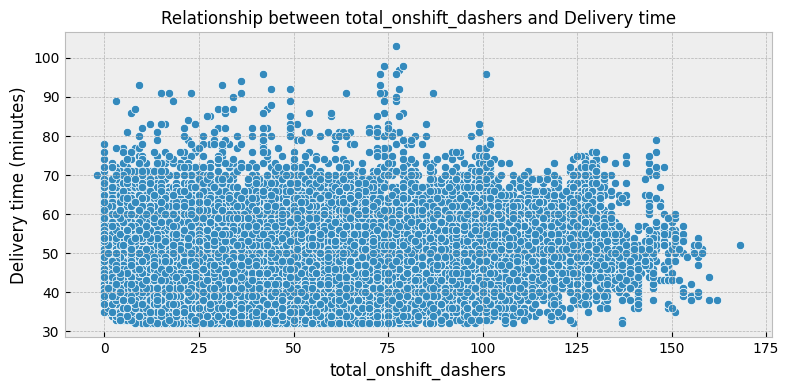

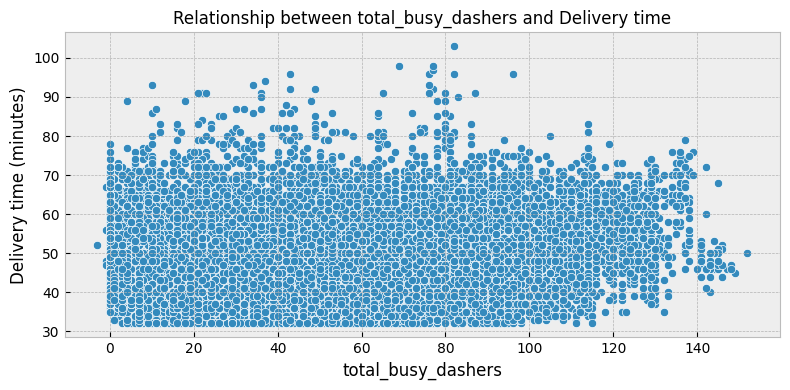

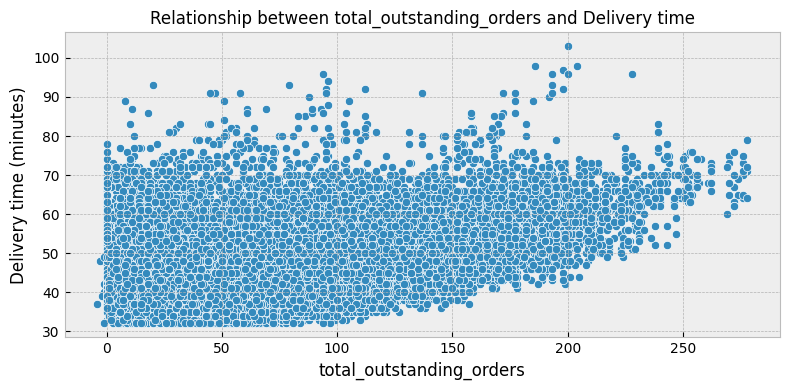

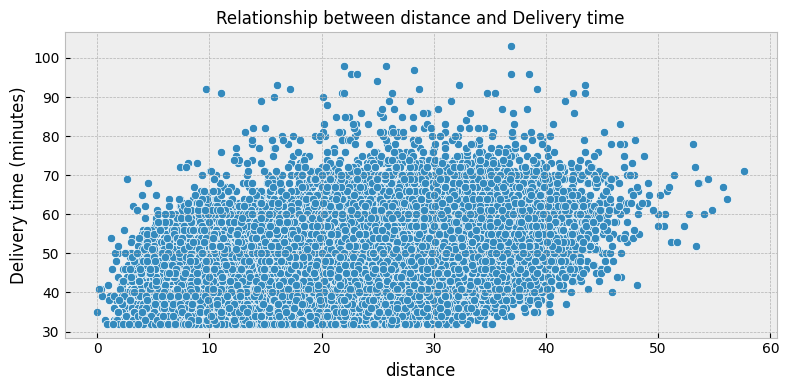

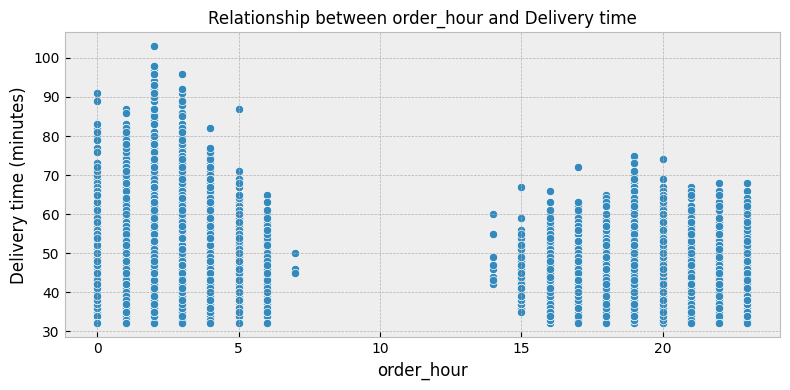

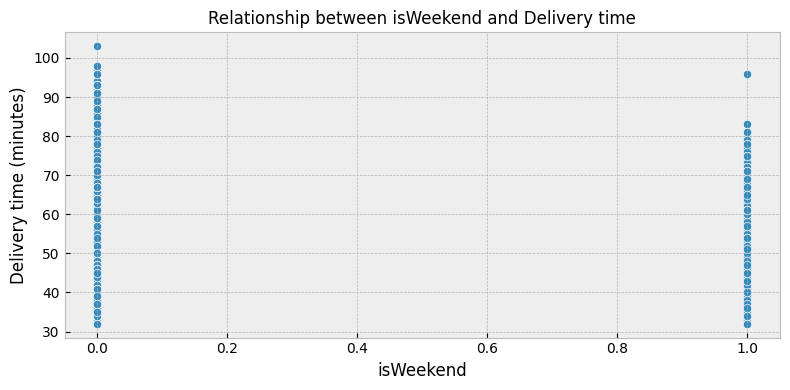

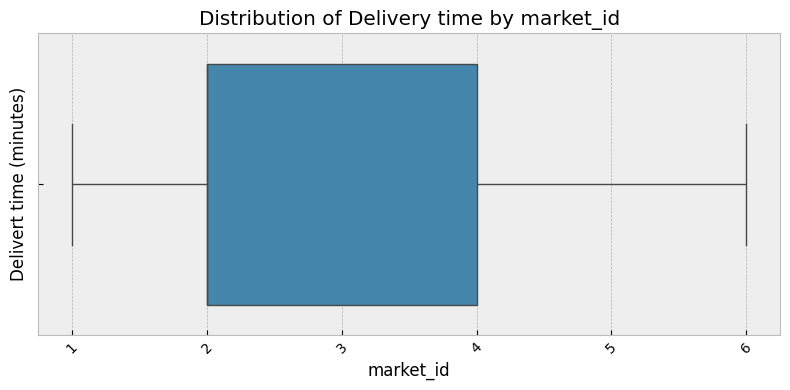

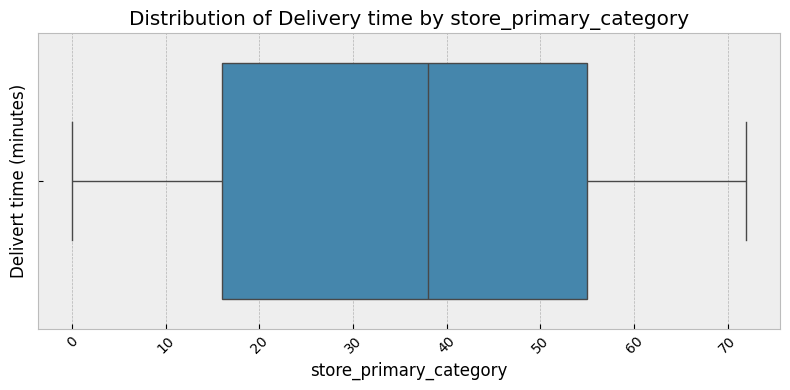

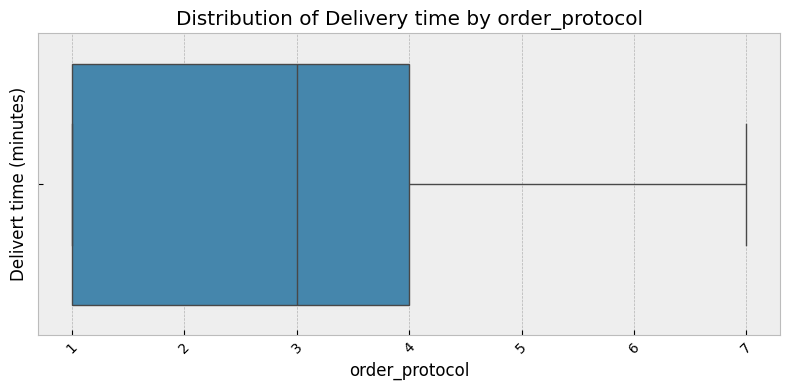

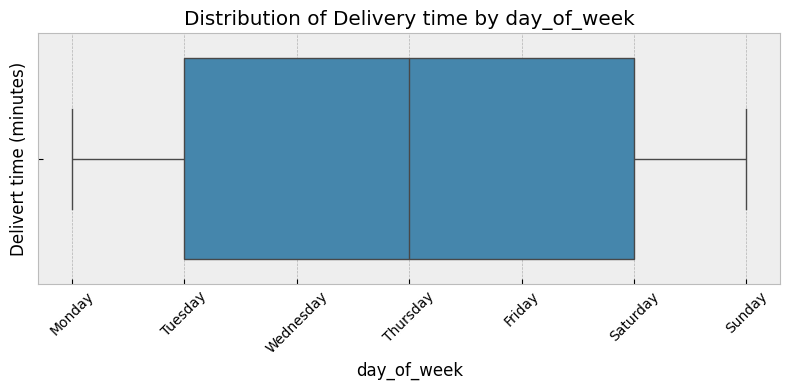

In [60]:
# Scatter plot to visualise the relationship between time_taken and other features
test_df = X_test.copy()
test_df['time_taken'] = y_test
print('Relationships Delivery time and Features on Validation Data')
# Using scatter plots for numerical features
for col in numerical_col_val:
  plt.figure(figsize= (8, 4))
  sns.scatterplot(y = test_df['time_taken'], x = test_df[col])
  plt.title(f'Relationship between {col} and Delivery time', size = 12)
  plt.xlabel(col)
  plt.ylabel('Delivery time (minutes)')
  plt.tight_layout()
  plt.show()
# Using Box plots for categorical features
for col in categorical_col_val:
  plt.figure(figsize = (8, 4))
  sns.boxplot(x = test_df[col])
  if col == 'day_of_week':
    day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.xticks(ticks = range(len(day_labels)), labels = day_labels, rotation = 45)
  else:
    plt.xticks(rotation = 45)
  plt.title(f'Distribution of Delivery time by {col}')
  plt.xlabel(col)
  plt.ylabel('Delivert time (minutes)')
  plt.tight_layout()
  plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [61]:
# Drop the weakly correlated columns from training dataset
# Correlation matrix on Validation Data
corr_matrix_test = train_df[numerical_columns + ['time_taken']].corr()
# Drop 3-5 weakly correlated columns from training dataset
delivery_time_corr_test = abs(corr_matrix_test['time_taken']).sort_values(ascending = True)
# Define weak correlation thershold (weak beteen -0.3 and 0.3)
weak_correlation_thershold = 0.3
weakly_correlated = delivery_time_corr_test[abs(delivery_time_corr_test) < weak_correlation_thershold]
columns_to_drop = weakly_correlated.index[:3]
X_test_dropped_weak_correlation = X_test.drop(columns = columns_to_drop)
print(f'\nCorrelation with Delivery time:\n{delivery_time_corr_test}')
print(f'\nWeakly correlated columns (|correlation| < {weak_correlation_thershold}): {list(weakly_correlated.index)}')
print(f'\nDropped columns: {list(columns_to_drop)}')
print(f'\nUpdated X_test columns: {list(X_test_dropped_weak_correlation.columns)}')


Correlation with Delivery time:
min_item_price              0.021468
isWeekend                   0.143216
total_onshift_dashers       0.173734
total_busy_dashers          0.208245
max_item_price              0.268523
total_items                 0.284677
num_distinct_items          0.294684
order_hour                  0.348551
total_outstanding_orders    0.376250
subtotal                    0.418908
distance                    0.465638
time_taken                  1.000000
Name: time_taken, dtype: float64

Weakly correlated columns (|correlation| < 0.3): ['min_item_price', 'isWeekend', 'total_onshift_dashers', 'total_busy_dashers', 'max_item_price', 'total_items', 'num_distinct_items']

Dropped columns: ['min_item_price', 'isWeekend', 'total_onshift_dashers']

Updated X_test columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'day_

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [62]:
# Import libraries
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [63]:
# Apply scaling to the numerical columns
# Columns to scale
numerical_cols_to_scale = remaining_numerical_cols # Task 3.4.1 and 4.3
# Initialize the scaler
scaler = StandardScaler()
# Aplly scalling
X_train_scale = X_train_dropped_weak_correlation.copy() # Task 3.4.2
X_test_scale = X_test_dropped_weak_correlation.copy() # Task 4.3
# Scaling to numerical columns
X_train_scale[numerical_cols_to_scale] = scaler.fit_transform(X_train_scale[numerical_cols_to_scale])
X_test_scale[numerical_cols_to_scale] = scaler.transform(X_test_scale[numerical_cols_to_scale])

print('Train data scaled featers statistics:')
print(X_train_scale[numerical_cols_to_scale].describe().round(4))
print('\nTest data scaled featers statistics:')
print(X_test_scale[numerical_cols_to_scale].describe().round(4))

Train data scaled featers statistics:
       total_items     subtotal  num_distinct_items  max_item_price  \
count  140621.0000  140621.0000         140621.0000     140621.0000   
mean        0.0000      -0.0000              0.0000          0.0000   
std         1.0000       1.0000              1.0000          1.0000   
min        -1.1491      -1.7016             -1.2509         -2.4424   
25%        -0.5795      -0.7769             -0.4153         -0.7222   
50%        -0.0099      -0.2506             -0.4153         -0.0850   
75%         0.5597       0.5255              0.4204          0.5609   
max         2.2685       2.4790              1.6739          2.4855   

       total_busy_dashers  total_outstanding_orders     distance   order_hour  
count         140621.0000               140621.0000  140621.0000  140621.0000  
mean              -0.0000                    0.0000      -0.0000      -0.0000  
std                1.0000                    1.0000       1.0000       1.0000  
mi

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [64]:
# Create/Initialise the model
y_train_actual = y_train_handled.copy() # Task 3.4.2
y_test_actual = y_test.copy() # Task 2.3.2
# Statsmodel - Add constant for intercept
X_train_sm = sm.add_constant(X_train_scale)
X_test_sm = sm.add_constant(X_test_scale)
# Scikit-learn Linear Regression
lr_model = LinearRegression()

In [65]:
# Train the model using the training data
# Train the statsmodels OLS model
ols_model = sm.OLS(y_train_actual, X_train_sm).fit()
# Use scikit-learn for training model
lr_model.fit(X_train_scale, y_train_actual)

LinearRegression()

In [66]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scale)
y_test_pred = lr_model.predict(X_test_scale)

In [67]:
# Find results for evaluation metrics
# Training data set evaluation metrics
train_mse = mean_squared_error(y_train_actual, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_actual, y_train_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
# Test data set evaluation metrics
test_mse = mean_squared_error(y_test_actual, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_actual, y_test_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print('Statistic OLS model summary on train data set:')
print(ols_model.summary())

print('\nEvaluation metrics of scikit-learn on Train data set:')
print(f'Mean squred error (MSE): {train_mse:.2f}')
print(f'Root mean squred error (RMSE): {train_rmse:.2f}')
print(f'Mean absolute error (MAE): {train_mae:.2f}')
print(f'R2 score: {train_r2:.4f}')

print('\nEvaluation metrics of scikit-learn on Test data set:')
print(f'Mean squred error (MSE): {test_mse:.2f}')
print(f'Root mean squred error (RMSE): {test_rmse:.2f}')
print(f'Mean absolute error (MAE): {test_mae:.2f}')
print(f'R2 score: {test_r2:.4f}')

Statistic OLS model summary on train data set:
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 2.757e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        19:09:56   Log-Likelihood:            -4.2535e+05
No. Observations:              140621   AIC:                         8.507e+05
Df Residuals:                  140608   BIC:                         8.508e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [68]:
# Loop through the number of features and test the model
# Initialize model for RFE
lr_model2 = LinearRegression()
# Store scores for each number of featers
rfe_results = []
# Loop all features and use the RFE method to recursively reduce the number of features one-by-one
for n in range(X_train_scale.shape[1], 0, -1):
  rfe = RFE(estimator = lr_model2, n_features_to_select = n)
  rfe.fit(X_train_scale, y_train_actual)
  y_test_pred = rfe.predict(X_test_scale)
  score = r2_score(y_test_actual, y_test_pred)
  rfe_results.append({'n_features': n, 'r2_score':score})
# Results to DataFrame
results_df = pd.DataFrame(rfe_results)
print(results_df.sort_values(by = 'r2_score', ascending = False))
# Create a DataFrame that will contain all features and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scale.columns
vif['VIF'] = [variance_inflation_factor(X_train_scale.values, i) for i in range(X_train_scale.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(f'VIF: {vif}')
# Select the best number of features
best_n = 8
rfe_final = RFE(estimator = lr_model2, n_features_to_select = best_n)
rfe_final.fit(X_train_scale, y_train_actual)
# Final selected feature columns
selected_features = X_train_scale.columns[rfe_final.support_].tolist()
print('Selected number of features (Top 8):', selected_features)

    n_features  r2_score
0           12  0.716648
1           11  0.716585
4            8  0.716512
2           10  0.716477
3            9  0.716274
5            7  0.715740
6            6  0.705495
7            5  0.692406
8            4  0.659271
9            3  0.535533
10           2  0.332291
11           1  0.148093
VIF:                     Features   VIF
8   total_outstanding_orders  8.19
7         total_busy_dashers  8.11
3                total_items  6.44
4                   subtotal  4.59
5         num_distinct_items  4.55
0                  market_id  3.70
2             order_protocol  3.70
1     store_primary_category  3.39
11               day_of_week  2.85
6             max_item_price  2.57
10                order_hour  1.21
9                   distance  1.00
Selected number of features (Top 8): ['market_id', 'order_protocol', 'subtotal', 'num_distinct_items', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']


In [69]:
# Build the final model with selected number of features
# Targets - Dependent
y_train_actual = y_train_handled.copy() # Task 3.4.2
y_test_actual = y_test.copy() # Task 2.3.2
# Independent features
X_train_rfe = X_train_scale[selected_features]
X_test_rfe = X_test_scale[selected_features]
# Scikit-learn Linear Regression
final_model = LinearRegression()
final_model.fit(X_train_rfe, y_train_actual)
# Statsmodels OLS model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
ols_model_final = sm.OLS(y_train_actual, X_train_rfe_sm).fit()
# Make predictions
y_train_pred_final = final_model.predict(X_train_rfe)
y_test_pred_final = final_model.predict(X_test_rfe)
# Final evaluation
# Training data set evaluation metrics
train_mse_final = mean_squared_error(y_train_actual, y_train_pred_final)
train_rmse_final = np.sqrt(train_mse_final)
train_mae_final = mean_absolute_error(y_train_actual, y_train_pred_final)
train_r2_final = r2_score(y_train_actual, y_train_pred_final)
# Test data set evaluation metrics
test_mse_final = mean_squared_error(y_test_actual, y_test_pred_final)
test_rmse_final = np.sqrt(test_mse_final)
test_mae_final = mean_absolute_error(y_test_actual, y_test_pred_final)
test_r2_final = r2_score(y_test_actual, y_test_pred_final)
# Create a DataFrame that will contain all features and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(f'VIF: {vif}')
print('\nStatistic OLS model summary on train data set:')
print(ols_model_final.summary())

print('\nEvaluation metrics of scikit-learn on Train data set:')
print(f'Mean squred error (MSE): {train_mse_final:.2f}')
print(f'Root mean squred error (RMSE): {train_rmse_final:.2f}')
print(f'Mean absolute error (MAE): {train_mae_final:.2f}')
print(f'R2 score: {train_r2_final:.4f}')

print('\nEvaluation metrics of scikit-learn on Test data set:')
print(f'Mean squred error (MSE): {test_mse_final:.2f}')
print(f'Root mean squred error (RMSE): {test_rmse_final:.2f}')
print(f'Mean absolute error (MAE): {test_mae_final:.2f}')
print(f'R2 score: {test_r2_final:.4f}')

VIF:                    Features   VIF
5  total_outstanding_orders  8.19
4        total_busy_dashers  8.10
1            order_protocol  2.76
0                 market_id  2.74
2                  subtotal  1.79
3        num_distinct_items  1.72
7                order_hour  1.19
6                  distance  1.00

Statistic OLS model summary on train data set:
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 4.114e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        19:10:09   Log-Likelihood:            -4.2561e+05
No. Observations:              140621   AIC:                         8.512e+05
Df Residuals:                  140612   BIC:                         8.513e+05
Df Model:

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

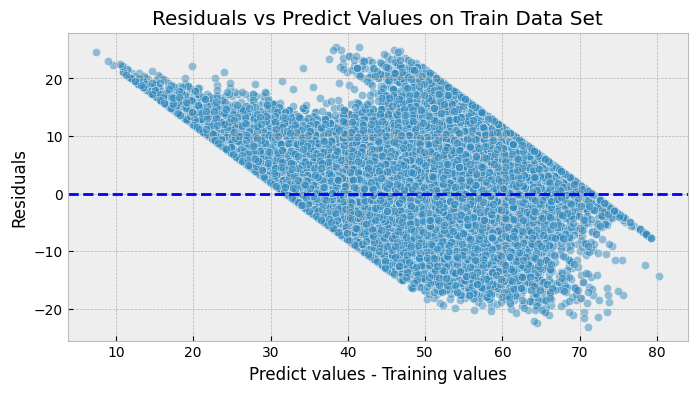

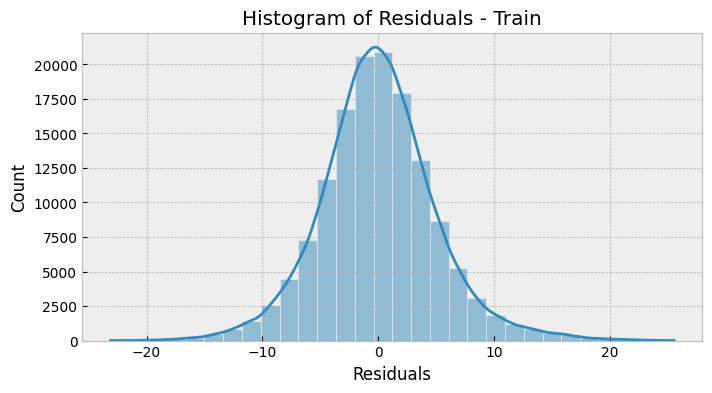

<Figure size 800x400 with 0 Axes>

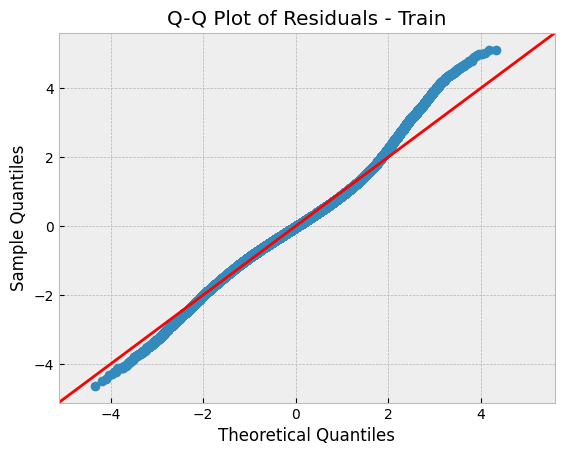

In [70]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Residual on train data set
residual_train = y_train_actual - y_train_pred_final
# Residual on test data set
residual_test = y_test_actual - y_test_pred_final
# Plot residual with predicted values
plt.figure(figsize= (8, 4))
sns.scatterplot(x = y_train_pred_final, y = residual_train, alpha = 0.5)
plt.axhline(0, color = 'blue', linestyle = '--')
plt.xlabel('Predict values - Training values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predict Values on Train Data Set')
plt.show()
# Plot histogram of residuals
plt.figure(figsize = (8, 4))
sns.histplot(residual_train, kde = True, bins = 30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals - Train')
plt.show()
# Q-Q plot
plt.figure(figsize = (8, 4))
sm.qqplot(residual_train, line = '45', fit = True)
plt.title('Q-Q Plot of Residuals - Train')
plt.show()

[Your inferences here:]
- Based on the scatter plot the residual are fan shaped, speading wider at lower and higher predicted values. This indicates heteroscedasticity.
- The histogram of residuals appears approximately normal distribute in center at zero.
- Q-Q plot, most of the residuals lie close to the red line indicates that the residuals mostly follow a normal distribution, but mild tail deviations at both ends as S-shaped suggest the presence of some outliers or extreme values.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [71]:
# Compare the scaled vs unscaled features used in the final model
scaled_coeffs = pd.Series(final_model.coef_, index = X_train_rfe.columns)
print('Scaled Coefficients:\n', scaled_coeffs)
# Get scaling parameters
feature_standard = scaler.scale_
feature_mean = scaler.mean_
feature_names = X_train_rfe.columns
# Mapping from feature name to standard only for feature have selected
feature_selected_dict = dict(zip(feature_names, feature_standard))
# Rescale coefficients to original scale
unscaled_coeffs = scaled_coeffs.copy()
for i in scaled_coeffs.index:
  unscaled_coeffs[i] = scaled_coeffs[i]/feature_selected_dict[i]
print('\nUnscaled coefficients:')
print(unscaled_coeffs)

Scaled Coefficients:
 market_id                   -0.725404
order_protocol              -0.782301
subtotal                     2.578914
num_distinct_items           0.466071
total_busy_dashers         -10.772309
total_outstanding_orders    12.569234
distance                     4.059954
order_hour                  -1.611579
dtype: float64

Unscaled coefficients:
market_id                  -0.413184
order_protocol             -0.000510
subtotal                    2.155073
num_distinct_items          0.001003
total_busy_dashers         -0.335021
total_outstanding_orders    0.247370
distance                    0.464996
order_hour                 -0.185724
dtype: float64


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [72]:
# Analyze the effect of a unit change in a feature, say 'total_items'
'''
'total_items' is not selected by RFE in the top 8 features, so its effect is not included in final linear regression model.
Therefore, we cannot evaluate its coefficient directly in the final model.
'''
# Temporarily include 'total_items' for check and analysis
X_train_items = X_train_scale.copy()
X_test_items = X_test_scale.copy()
# Fit total_items with model only
model_items = LinearRegression()
model_items.fit(X_train_items[['total_items']], y_train_actual)
# Coefficient and standard deviation of total_items
coef_scaled_items = model_items.coef_[0]
std_total_items = dict(zip(X_train_scale.columns, scaler.scale_))['total_items']
# Coefficient unscaled
coef_unscaled_items = coef_scaled_items/std_total_items
print(f'Scaled coefficent for total_items: {coef_scaled_items:.4f}')
print(f'\nUnscaled coefficent for total_items: {coef_unscaled_items:.4f}')

Scaled coefficent for total_items: 2.5971

Unscaled coefficent for total_items: 0.0056


As an unscaled total_items of 0.0056 means that every additional item in the order the expected delivery time increases by ~ 0.0056 minutes.

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, there are categorical variables in the dataset of linear regression model.
- market_id: different market locations. There has a negative coefficient, indicate that certain markets are associated with faster delivery times than others.
- order_protocol: the method or type of order. There has a negative coefficient, suggest that some order are more efficient.
- Both categorical variables are statistically significant (p < 0.05), they a real impact on delivery time.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2, that means 20% of the entire dataset is allocated to the test set, while remaining 80% is used to train the model. This allow the model to be evaluat on unknown data to assess in the real life.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> In task 3.3 correlation analysis look at the heatmap and the correlation values, 'distance' has the highest correlation with the target variable'time_taken' with a correlation coefficient about 0.46, the second is subtotal with correlation coefficient about 0.41.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>- In task 3.4 outlier handling to detect outliers, I used summary statistics, visualizations such as boxplots and histograms, and the IQR method.
- Handling outliers capped in numerical columns within IQR bounds, skewness reduced for most features such as time_taken from 0.76 to 0.60 and total_items from 26.80 to 0.84.
- I also define dataset without negative values by clipped lower bound.
- Retian the outliers, I reduce their impact by applied feature scaling (StandardScaler) before model training.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on task 5.3 the final model's coefficient analysis and statistically significant (p-values) the top 3 features significantly impacting delivery time are:
- total_outstanding_orders: a strong positive impact (12.5692), more outstanding orders lead to longer delivery times.
- total_busy_dashers: a strong negative impact (-10.7723), more dashers variable reduces delivery time.
- distance: a positive affect (4.0600), longer distances naturally increase delivery time.

These features had the largest absolute coefficient and were statistically significant (p-values < 0.05), indicating a strong influence on the target variable.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a linear relationship between input variables - (independent variables) and outputs (dependent variables). The goal to find the best-fit pattern that minimizes the error between the predicted value and the actual value.
- There are two equations: simple linear regression and multiple linear regression.
- The model is trained by minimizing a loss function, usually use Mean Squared Error (MSE). In python use scikit-learn or statsmodels to training dataset and testing.
- Evaluation metrics such as R-squared - proportion of variance in target explained by the model, MSE/RMSE/MAE measure the prediction errors.
- Linear regressions are linearity, homoscedasticity, independence, normality and no multicollinearity.
- In the equation of a significant model each coefficient represents how impact to the target variable change.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The key difference between simple linear regression and multiple linear regression is in the number of independent variable use to predict the dependent variable or target variable.
 - Simple linear regression: The models have relationship between one feature (independent variable) and one target variable (dependent variable).
 - Multiple linear regression: The models have relationship between two or more features (independent variables) and one target variable (dependent variable).



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how well the predictions of model with actual data. Its role to quantify the error between predicted values(y_pred) and true values (y_actual), that help the model learn the best fitting line. How is it minimized:
- Measure the mean squared error (MSE).
- Using gradient descent to optimize algorithm follow steps: compute the gradient, update the parameters, and repeat until the cost function reaches its lowest value.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Both overfitting and underfitting are problems with machine learning models' ability to work unseen data.
- Overfitting: occurs when a model is too complex in training data, the model performs very well on the training set but poorly on new or unseen data.
- Underfitting: happen when the model is too simple and fails to capture important relationships between independent and dependent variables, the model performs poorly on both training and test sets.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residuals plots are usful to evaluate the performance of linear regression model by analyzing the difference between actual values and predicted values (residuals)
- Detecting non-linearity: clear pattern show that model is not capturing non-linear relationships correctly. Residual should be randomly scattered around zero, a bad residual plot will have trends, patterns or increasing spread.
- Detecting outliers and influential points: extreme values cause large residuals.
- Identifying homoscedasticity and heteroscedasticity.
- Checking for autocorrelation: the model may be missing key features or showing correlated errors.